In [144]:
import pandas as pd
import numpy as np

# Load the data

x_train = pd.read_csv('Dataset/x_train_all.csv')  
y_train = pd.read_csv('Dataset/y_train_all.csv')
y_train_outliers = y_train.copy()

summary_stats = x_train.describe()
summary_stats

0            1            2            3            4  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     89.658514    89.545201    89.343756    89.566770    89.812590   
std      77.521341    77.430539    77.350452    77.498754    77.437292   
min       5.000000     5.000000     4.000000     5.000000     5.000000   
25%      32.000000    32.000000    32.000000    31.000000    32.000000   
50%      57.000000    58.000000    57.000000    58.000000    58.000000   
75%     126.000000   124.000000   122.750000   123.000000   125.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

                 5            6            7            8            9  ...  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000  ...   
mean     89.853251    89.883282    89.978431    90.170175    90.519092  ...   
std      77.279125    77.085714    77.081732    77.062371    77.155644  ...   
min       5.000000     5.000000     4.000000     4.000000     4.000000  ...   
25%      32.000000    32.000000    33.000000    33.000000    33.000000  ...   
50%      58.000000    58.000000    58.000000    59.000000    59.000000  ...   
75%     123.750000   124.000000   124.000000   124.000000   126.000000  ...   
max     255.000000   255.000000   255.000000   255.000000   255.000000  ...   

              2294         2295         2296         2297         2298  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     72.234881    71.833437    71.394118    70.572136    69.660165   
std      65.369022    65.439225    65.402298    65.144238    64.885963   
min       4.000000     4.000000     4.000000     5.000000     4.000000   
25%      26.000000    26.000000    26.000000    26.000000    26.000000   
50%      46.000000    46.000000    46.000000    45.000000    45.000000   
75%      95.000000    93.000000    91.000000    88.000000    86.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

              2299        2300         2301         2302         2303  
count  9690.000000  9690.00000  9690.000000  9690.000000  9690.000000  
mean     68.878638    68.29453    67.831889    67.548297    67.393189  
std      64.530366    64.27455    63.799350    63.437102    63.506304  
min       4.000000     4.00000     5.000000     4.000000     4.000000  
25%      25.000000    25.00000    25.000000    25.000000    25.000000  
50%      44.000000    44.00000    43.000000    43.000000    43.000000  
75%      84.000000    82.00000    82.000000    81.000000    81.000000  
max     255.000000   255.00000   255.000000   255.000000   255.000000  

[8 rows x 2304 columns]

<div style="text-align: center;">

## Initial Silhouette Scores:

#### 10 clusters - 0.14337657005172605
#### 8 clusters - 0.15572181678470226
#### 6 clusters - 0.20639571486279004
#### 4 clusters - 0.3119771748068869
#### 2 clusters - 0.3568434794605163

In [259]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score

# K-Means Clustering Function set with the a random_state of 19 and n_init of 10 to ensure consistency.

def kmeansfunc(data, k, inertia=True):
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)

    # Inertia, otherwise known as within-cluster sum of squares. It quantifies the total spread or variance 
    # within the clusters created by the k-means algorithm.
    
    if inertia == True:
        print("Inertia: ", kmeans.inertia_)

    return clusters

# Function to commpute the silhouette score. It assesses the quality of clusters produced by our clustering algorithm.
# The higher the score, the better the clustering.

def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

# Function to compute the Davies-Bouldin score. It assesses the quality of clustering by considering both the average similarity
# between clusters and the dissimilarity between the clusters. The lower the score, the better the clustering.

def db_score(data, clustersdata):
    davies_bouldin = davies_bouldin_score(data, clustersdata)
    print("Davies-Bouldin Score:", davies_bouldin)
    return davies_bouldin

# Function to compute the Calinski-Harabasz score. It assesses the quality of clustering by measuring the ratio between the 
# within-cluster dispersion and the between-cluster dispersion. The higher the score, the better the clustering.

def calinski_score(data, clustersdata):
    calinski_harabasz = calinski_harabasz_score(data, clustersdata)
    print("Calinski-Harabasz Score:", calinski_harabasz)
    return calinski_harabasz

def accuracy_metric(y_train, cluster_labels, num_clusters):
    cluster_to_majority_class = {}

    for cluster_label in range(num_clusters):
        cluster_mask = (cluster_labels == cluster_label)
        cluster_ground_truth_labels = y_train[cluster_mask]
        if type(cluster_ground_truth_labels) == pd.DataFrame:
            cluster_ground_truth_labels = cluster_ground_truth_labels.to_numpy()
        cluster_ground_truth_labels = cluster_ground_truth_labels.flatten() # Flatten the labels
        if len(cluster_ground_truth_labels) == 0:
            majority_class = 0
        else:
            majority_class = np.bincount(cluster_ground_truth_labels).argmax()
        cluster_to_majority_class[cluster_label] = majority_class

    # Map cluster labels to majority class labels
    cluster_assigned_labels = np.array([cluster_to_majority_class[label] for label in cluster_labels])

    # Calculate the accuracy of the clustering
    accuracy = accuracy_score(y_train, cluster_assigned_labels)
    print(f"Accuracy: {accuracy}")

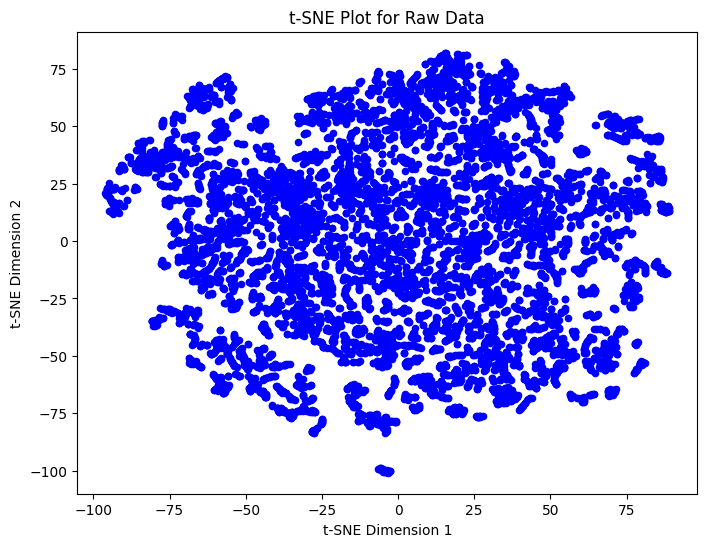

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

# t-SNE Plot for Raw Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [118]:
# 2 clusters on the Raw Data

clusters_raw2 = kmeansfunc(raw_data, 2)
clusters_raw2 = clusters_raw2.to_numpy().ravel()
db_score(raw_data, clusters_raw2)
calinski_score(raw_data, clusters_raw2)
accuracy_metric(y_train, clusters_raw2, 2)
silhouetteScore(raw_data,clusters_raw2)

Inertia:  65497786443.08869
Davies-Bouldin Score: 1.3051138364604997
Calinski-Harabasz Score: 5148.986891793889
Accuracy: 0.28617131062951495
Silhouette Score: 0.3568434794605163


0.3568434794605163

In [119]:
# 4 clusters on the Raw Data

clusters_raw4 = kmeansfunc(raw_data, 4)
clusters_raw4 = clusters_raw4.to_numpy().ravel()
db_score(raw_data, clusters_raw4)
calinski_score(raw_data, clusters_raw4)
accuracy_metric(y_train, clusters_raw4, 4)
silhouetteScore(raw_data,clusters_raw4)

Inertia:  49316167920.45112
Davies-Bouldin Score: 1.6143965996818797
Calinski-Harabasz Score: 3338.410099772859
Accuracy: 0.2933952528379773
Silhouette Score: 0.3119771748068869


0.3119771748068869

In [120]:
# 6 clusters on the Raw Data

clusters_raw6 = kmeansfunc(raw_data, 6)
clusters_raw6 = clusters_raw6.to_numpy().ravel()
db_score(raw_data, clusters_raw6)
calinski_score(raw_data, clusters_raw6)
accuracy_metric(y_train, clusters_raw6, 6)
silhouetteScore(raw_data,clusters_raw6)

Inertia:  42723769606.66766
Davies-Bouldin Score: 1.7383688447218548
Calinski-Harabasz Score: 2610.498018909493
Accuracy: 0.33611971104231164
Silhouette Score: 0.20639571486279004


0.20639571486279004

In [121]:
# 8 clusters on the Raw Data

clusters_raw8 = kmeansfunc(raw_data, 8)
clusters_raw8 = clusters_raw8.to_numpy().ravel()
db_score(raw_data, clusters_raw8)
calinski_score(raw_data, clusters_raw8)
accuracy_metric(y_train, clusters_raw8, 8)
silhouetteScore(raw_data,clusters_raw8)

Inertia:  39315928092.10597
Davies-Bouldin Score: 1.827772212142516
Calinski-Harabasz Score: 2145.735692943448
Accuracy: 0.3505675954592363
Silhouette Score: 0.15572181678470226


0.15572181678470226

In [122]:
# 10 clusters on the Raw Data

clusters_raw10 = kmeansfunc(raw_data, 10)
clusters_raw10 = clusters_raw10.to_numpy().ravel()
db_score(raw_data, clusters_raw10)
calinski_score(raw_data, clusters_raw10)
accuracy_metric(y_train, clusters_raw10, 10)
silhouetteScore(raw_data,clusters_raw10)

Inertia:  37364768966.3394
Davies-Bouldin Score: 1.8546934033798876
Calinski-Harabasz Score: 1811.8564129653143
Accuracy: 0.3569659442724458
Silhouette Score: 0.14337657005172605


0.14337657005172605

In [123]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

# Looping through the cluster range to compute the inertia and silhouette scores for each k value.

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    graph_clusters = kmeans.fit_predict(x_train)
    graph_clusters = graph_clusters.ravel()
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(x_train, graph_clusters)
    silhouette_scores.append(score)

Silhouette Score: 0.3568434794605163
Silhouette Score: 0.31787386895790926
Silhouette Score: 0.3119771748068869
Silhouette Score: 0.2138514956492619
Silhouette Score: 0.20639571486279004
Silhouette Score: 0.20870216130087987
Silhouette Score: 0.15572181678470226
Silhouette Score: 0.1420112913785431
Silhouette Score: 0.14337657005172605
Silhouette Score: 0.1364338850163759
Silhouette Score: 0.1359093551086233
Silhouette Score: 0.13748274838828584
Silhouette Score: 0.13491903897182722
Silhouette Score: 0.1353529757412136


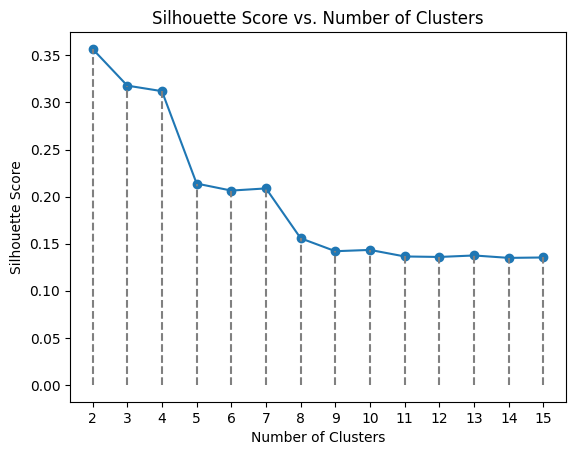

In [124]:
# Plotting the silhouette scores against the number of clusters.

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [125]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pre-processing from part 1

p_df = pd.read_csv('processed_df2.csv')
p_df.shape

(9690, 2304)

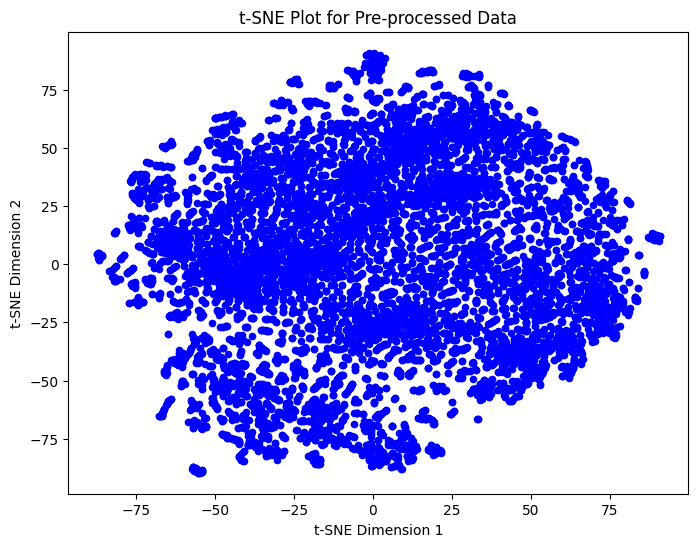

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

preprocessed_data = p_df.to_numpy()

# t-SNE Plot for Pre-processed Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

preprocessed_embedded = tsne.fit_transform(preprocessed_data)

plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_embedded[:, 0], preprocessed_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [127]:
# Grayscale to pseudo-infrared conversion function.

def grayscale_to_infrared(grayscale_image):
    # Convert the input grayscale image to a NumPy array with a data type of uint8.
    row = np.array(grayscale_image, dtype=np.uint8)

    # Define a color map for mapping grayscale values to a color representation.
    color_map = plt.get_cmap('hot')

    # Normalize the grayscale image to the range [0, 1].
    normalized_image = row / 255.0

    # Apply the color map to the normalized image and extract the red channel (infrared representation).
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)

    # Flatten the resulting infrared image to obtain a 1D array.
    return infrared_image.flatten()

In [128]:
infrared_original = []

# Loop through the indices and values in the 'x_train' DataFrame.
for i, idx in enumerate(x_train.index):
    # Extract the grayscale image from the DataFrame and reshape it to 48x48 dimensions.
    original_image = x_train.iloc[idx].values.reshape(48, 48)

    # Convert the grayscale image to an infrared-like representation using the 'grayscale_to_infrared' function.
    infrared_image = grayscale_to_infrared(original_image)

    # Append the resulting infrared image to the 'infrared_original' list.
    infrared_original.append(infrared_image)

# Create a DataFrame 'infrared_df_org' from the list of infrared images.
infrared_df_org = pd.DataFrame(infrared_original)

# Get the shape of the resulting DataFrame to see the dimensions.
infrared_df_org.shape

(9690, 2304)

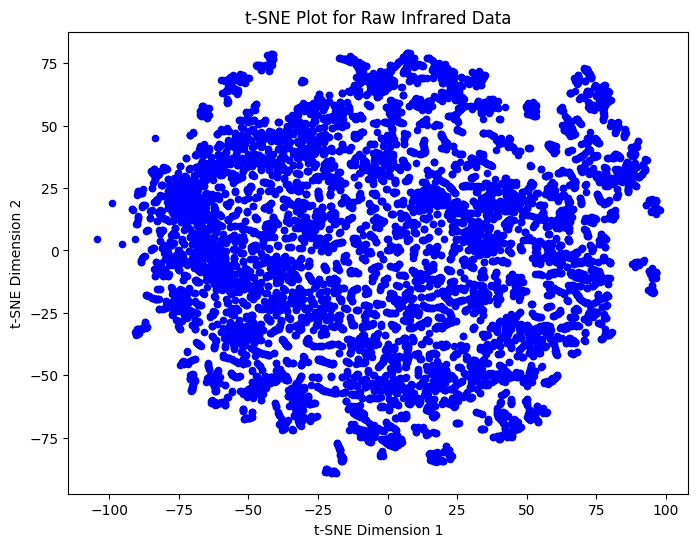

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

# t-SNE Plot for the Raw data converted to Pseudo-Infrared

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


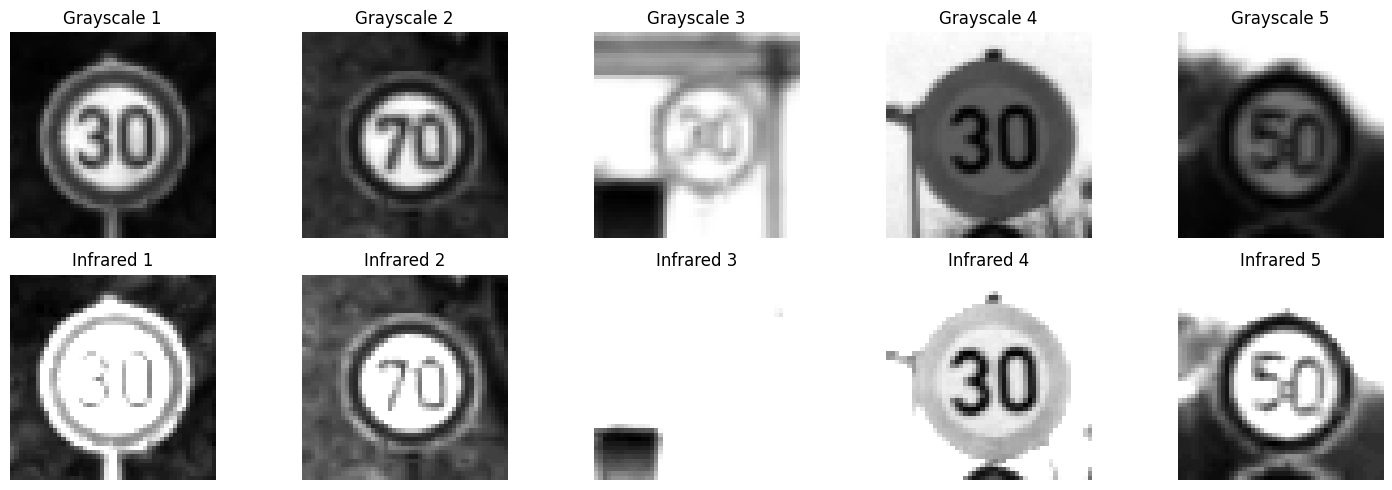

In [130]:
# Visualizing the Grayscale and Infrared Images

sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [131]:
# 10 clusters on the Raw Infrared Data

clusters = kmeansfunc(infrared_df_org, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_org, clusters)
calinski_score(infrared_df_org, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(infrared_df_org,clusters)

Inertia:  42586399938.51187
Davies-Bouldin Score: 2.039513157390206
Calinski-Harabasz Score: 2074.2512632638036
Accuracy: 0.35541795665634673
Silhouette Score: 0.13481848683347666


0.13481848683347666

In [145]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)

y_train = y_train.drop(outlier_indices)

In [133]:
# 10 clusters on the Infrared Data without outliers

clusters = kmeansfunc(infra_no_outliers, 10)
clusters = clusters.to_numpy().ravel()

db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(infra_no_outliers,clusters)

Inertia:  36507130738.34281
Davies-Bouldin Score: 1.872209273196369
Calinski-Harabasz Score: 1738.022396950417
Accuracy: 0.35796935265297614
Silhouette Score: 0.14197652594783366


0.14197652594783366

In [134]:
# Normalizing the Infrared Data without outliers

mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [135]:
# 10 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_norm, clusters)
calinski_score(infra_norm, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(infra_norm,clusters)

Inertia:  8628579.582745984
Davies-Bouldin Score: 2.028669552154143
Calinski-Harabasz Score: 1662.3865938708923
Accuracy: 0.3471281142499739
Silhouette Score: 0.1368738510055143


0.1368738510055143

In [136]:
# Normalizing x_train

mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [137]:
# Converting every image from the normalized x_train to pseduo-infrared images.

infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [138]:
# 10 clusters on the Normalized Infrared Data

clusters = kmeansfunc(infrared_df_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_norm, clusters)
calinski_score(infrared_df_norm, clusters)
accuracy_metric(y_train_outliers, clusters, 10)
silhouetteScore(infrared_df_norm, clusters)

Inertia:  28916431035.709877
Davies-Bouldin Score: 2.4929967816354783
Calinski-Harabasz Score: 1577.8280725389689
Accuracy: 0.3156862745098039
Silhouette Score: 0.5046952615364717


0.5046952615364717

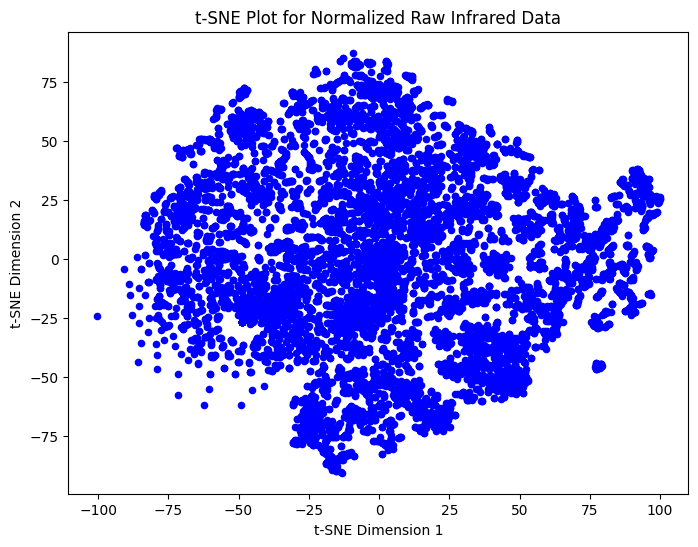

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_norm.to_numpy()

# t-SNE Plot for the Normalized Raw Infrared Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [140]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest on the Normalized Infrared Data

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [146]:
# 10 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(infra_norm_no_outliers, clusters)

Inertia:  27467387926.813747
Davies-Bouldin Score: 9.504043167685627
Calinski-Harabasz Score: 82.31682699456356
Accuracy: 0.31814865005733345
Silhouette Score: 0.5016481867119463


0.5016481867119463

In [147]:
y_train.shape

(9593, 1)

In [148]:
from sklearn.cluster import KMeans

# Computing another elbow plot to see if the optimal number of clusters changes.

wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19, n_init=10)
    kmeans.fit(infra_norm_no_outliers) 
    wcss.append(kmeans.inertia_)

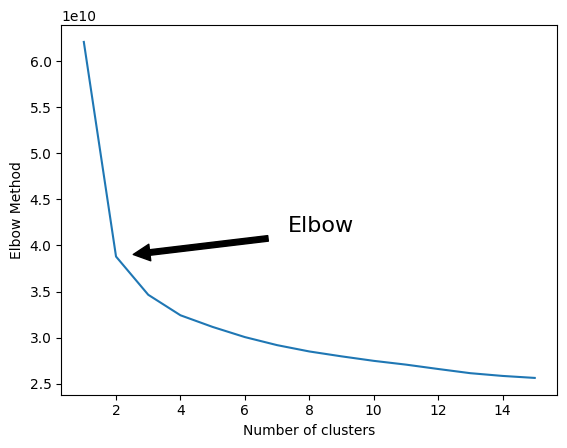

In [149]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(2, wcss[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Elbow Method') 
plt.show()

In [150]:
# 2 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm_no_outliers, 2)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(y_train, clusters, 2)
silhouetteScore(infra_norm_no_outliers,clusters)

Inertia:  38799395156.324585
Davies-Bouldin Score: 2.5573218315157584
Calinski-Harabasz Score: 436.12818632460574
Accuracy: 0.27322005629104557
Silhouette Score: 0.6776758908035815


0.6776758908035815

In [151]:
# Function to apply Gaussian blur to an input image
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Apply Gaussian blur to the image with the specified kernel size and sigma.
    row = cv2.GaussianBlur(row, kernel_size, sigma)

    return row

# Function to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to an input image
def apply_clahe(row):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Create a CLAHE object with specific parameters (clipLimit and tileGridSize).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image to enhance local contrast.
    equalized_row = clahe.apply(row)

    return equalized_row

In [152]:
infrared_prep = []

# Apply the above functions to each image in the infra_norm_no_outliers DataFrame.

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [153]:
infra_norm_no_outliers.shape

(9593, 2304)

In [154]:
# Functions designed to help determine the best seed value.

def kmeansfunc_iter(data, k, seed):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [155]:
# seed_value = 0
# max_score = 0
# best_seed = 0

# # Looping through the seed values from 0-100 to find the seed value that yields the highest silhouette score.

# while seed_value<101:
#     clusters = kmeansfunc_iter(prepped_infrared_df, 10, seed_value)
#     cur_score = silhouetteScore_iter(prepped_infrared_df, clusters)
#     if cur_score > max_score:
#         best_seed = seed_value
#         max_score = cur_score
#     seed_value = seed_value + 1

In [156]:
# print(best_seed)
# max_score

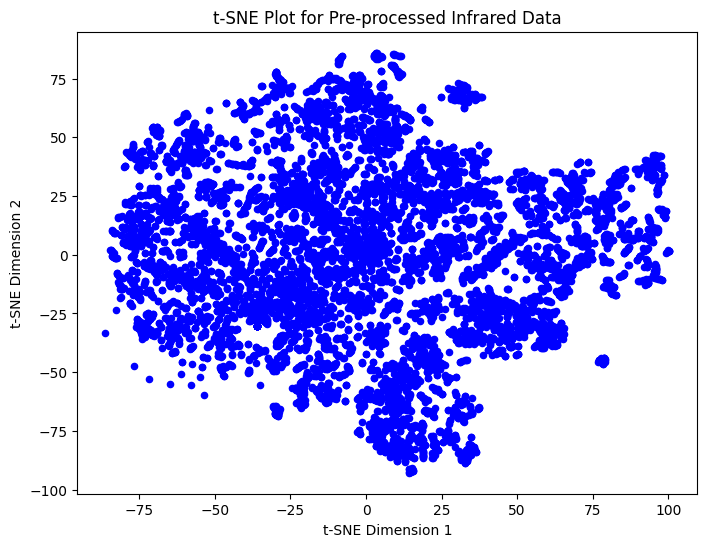

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the Pre-processed Infrared Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [158]:
# 10 clusters on the Pre-processed Infrared Data

clusters = kmeansfunc(prepped_infrared_df, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  16758303468.035269
Davies-Bouldin Score: 2.1610167138320424
Calinski-Harabasz Score: 2041.730862207949
Accuracy: 0.31241530282497654
Silhouette Score: 0.5041986688186679


0.5041986688186679

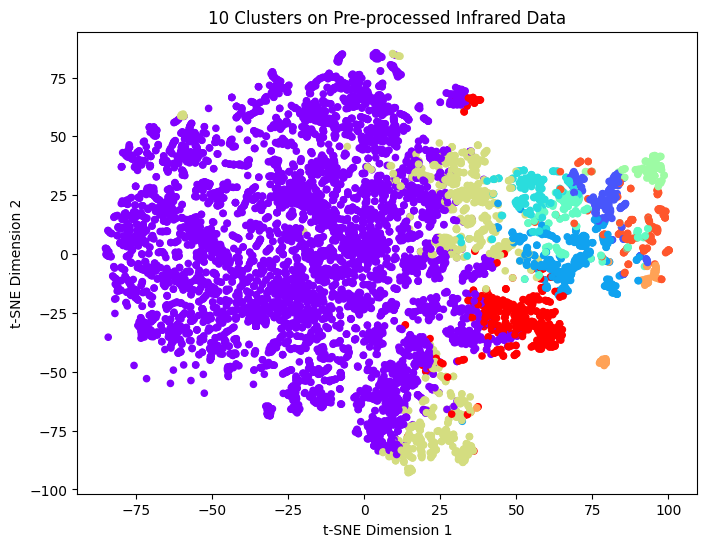

In [159]:
infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the above clustering

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [160]:
# 2 clusters on the Pre-processed Infrared Data

clusters = kmeansfunc(prepped_infrared_df, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
accuracy_metric(y_train, clusters, 2)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  26778047697.812164
Davies-Bouldin Score: 0.9552133638986922
Calinski-Harabasz Score: 7920.712473636974
Accuracy: 0.2728030855832378
Silhouette Score: 0.7033537860848569


0.7033537860848569

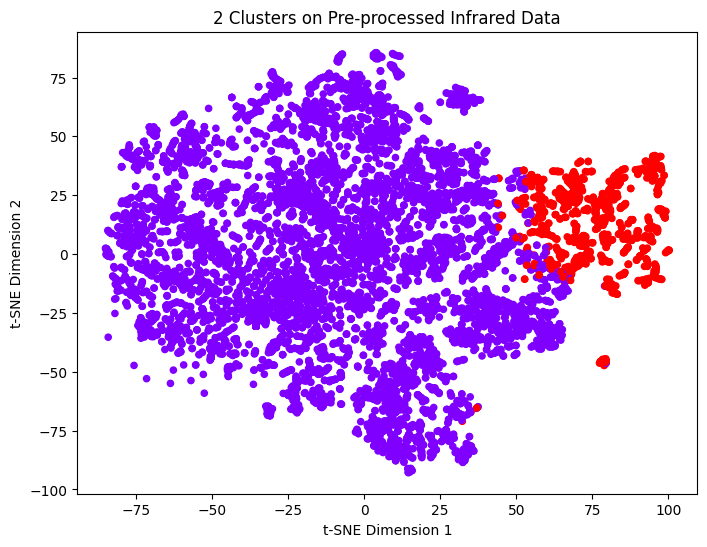

In [161]:
infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [162]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Function to perform PCA on a given dataset with a specified number of components.

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [163]:
# 10 clusters on 50 component PCA preprocessed infrared data.

df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 10)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
accuracy_metric(y_train, clusters_pca50, 10)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  11818538173.030869
Davies-Bouldin Score: 1.7450537990656927
Calinski-Harabasz Score: 2902.6622564343857
Accuracy: 0.32492442405920985
Silhouette Score: 0.5494785100223191


0.5494785100223191

In [164]:
# 2 clusters on 50 component PCA preprocessed infrared data.

df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 2)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
accuracy_metric(y_train, clusters_pca50, 2)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  21924179888.767094
Davies-Bouldin Score: 0.864085791049845
Calinski-Harabasz Score: 9674.046524068212
Accuracy: 0.2728030855832378
Silhouette Score: 0.7293637524974788


0.7293637524974788

In [165]:
image_df = prepped_infrared_df.copy()

In [166]:
# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

fourier_df = pd.DataFrame(fourier_transformed_images)

In [167]:
image_df = prepped_infrared_df.copy()

In [168]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data using MinMaxScaler.

scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [169]:
# 10 clusters on the scaled data.

clusters = kmeansfunc(scaled_data_normalized, 10)
clusters = clusters.to_numpy().ravel()
db_score(scaled_data_normalized, clusters)
calinski_score(scaled_data_normalized, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(scaled_data_normalized, clusters)

Inertia:  327989.06557153875
Davies-Bouldin Score: 2.1224684459426264
Calinski-Harabasz Score: 1863.7683031502645
Accuracy: 0.34076931095590535
Silhouette Score: 0.3726768395125648


0.3726768395125648

In [170]:
prepped_infrared_df.shape

(9593, 2304)

In [171]:
# Function to apply a median filter to an input image
def apply_median_filter(image, kernel_size=37):
    # Apply a median filter to the image with the specified kernel size.
    return cv2.medianBlur(image, kernel_size)

# Function to apply Gaussian blur to an input image using OpenCV
def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    # Apply Gaussian blur to the image with the specified kernel size.
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to apply bilateral filter to an input image
def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    # Apply a bilateral filter to the image with the specified parameters (diameter, sigma_color, and sigma_space).
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [172]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

# Apply the above functions to each image in the pre-processed pseudo-infrared DataFrame.

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

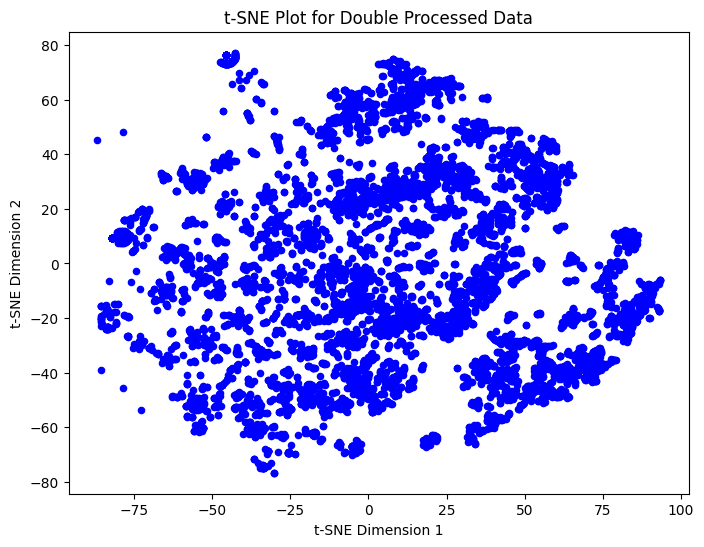

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df2.to_numpy()

# t-SNE Plot for the double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [176]:
# 10 clusters on the double-processed pseudo-infrared data frame.

clusters = kmeansfunc(prepped_infrared_df2, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  3797272064.508808
Davies-Bouldin Score: 1.3650384748399522
Calinski-Harabasz Score: 6878.575689738602
Accuracy: 0.2900031272803086
Silhouette Score: 0.7680452850582176


0.7680452850582176

In [177]:
clusters.shape

(9593,)

In [178]:
# 2 clusters on the double-processed pseudo-infrared data frame.

clusters = kmeansfunc(prepped_infrared_df2, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
accuracy_metric(y_train, clusters, 2)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  11172100781.2452
Davies-Bouldin Score: 0.6848884133348282
Calinski-Harabasz Score: 14727.997624261909
Accuracy: 0.25935578025643696
Silhouette Score: 0.8695890578167562


0.8695890578167562

In [179]:
# 50 component PCA on the double-processed pseudo-infrared data frame.

pca_50 = PCAOnData(prepped_infrared_df2, 50)

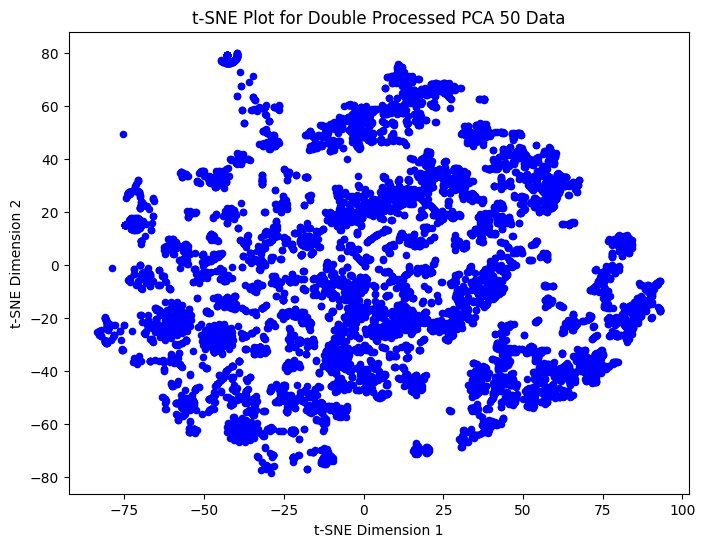

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

# t-SNE Plot for the 50 compnent PCA double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(pca_50)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed PCA 50 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [181]:
# 10 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(pca_50, clusters)

Inertia:  3566737219.8802123
Davies-Bouldin Score: 1.32743711015508
Calinski-Harabasz Score: 7326.182587708006
Accuracy: 0.2903158553111644
Silhouette Score: 0.7677289597936224


0.7677289597936224

In [182]:
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure that y_train and clusters are NumPy arrays
y_train = np.asarray(y_train)
cl = clusters.copy()  # Create a copy of the cluster labels

# Initialize an array to store adjusted cluster labels
adjusted_clusters = np.copy(cl)

# Calculate the overall distribution of class labels in the entire dataset
label_distribution = np.bincount(y_train.flatten())

for cluster_id in range(10):
    # Get the indices of data points belonging to the current cluster
    cluster_indices = np.where(cl == cluster_id)[0]
    
    if len(cluster_indices) > 0:
        # Extract ground truth labels for the data points in the current cluster
        cluster_labels = y_train[cluster_indices]
        
        # Calculate the distribution of class labels within the cluster
        cluster_label_distribution = np.bincount(cluster_labels.flatten())
        
        # Find the label that appears most frequently within the cluster
        most_frequent_label = np.argmax(cluster_label_distribution)
        
        # Find the label that is most frequent in the entire dataset
        most_frequent_global_label = np.argmax(label_distribution)
        
        # If the most frequent label within the cluster is not the most frequent globally, use it
        if most_frequent_label != most_frequent_global_label:
            adjusted_clusters[cluster_indices] = most_frequent_label

# Calculate accuracy using adjusted cluster labels
accuracy = accuracy_score(y_train, adjusted_clusters)

print(f"Clustering Accuracy: {accuracy}")
print(adjusted_clusters)


Clustering Accuracy: 0.2903158553111644
[1 1 1 ... 1 1 1]


In [185]:
# 2 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(y_train, clusters, 2)
silhouetteScore(pca_50, clusters)

Inertia:  10951691553.549603
Davies-Bouldin Score: 0.6776470526947028
Calinski-Harabasz Score: 15024.377023521825
Accuracy: 0.25935578025643696
Silhouette Score: 0.8711218430711795


0.8711218430711795

In [186]:
# 5 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(y_train, clusters, 5)
silhouetteScore(pca_50, clusters)

Inertia:  5029308158.604475
Davies-Bouldin Score: 1.188259640433762
Calinski-Harabasz Score: 10999.26074448437
Accuracy: 0.2789534035234025
Silhouette Score: 0.7906898942434496


0.7906898942434496

In [187]:
# PCA on the double-processed pseudo-infrared data frame with 3 components.

pca_3 = PCAOnData(prepped_infrared_df2, 3)

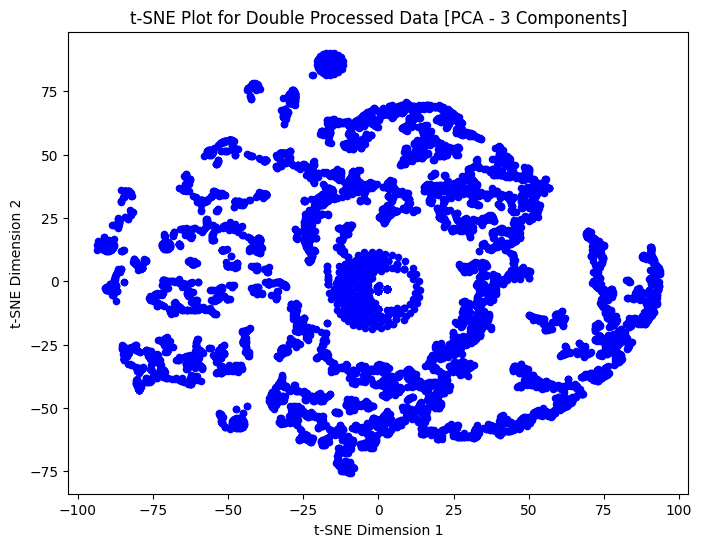

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = pca_3.to_numpy()

# t-SNE Plot for the 3 component PCA double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [189]:
from sklearn.cluster import KMeans

# Computing an elbow plot to see if the optimal number of clusters changes.

wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19, n_init=10)
    kmeans.fit(pca_3) 
    wcss.append(kmeans.inertia_)

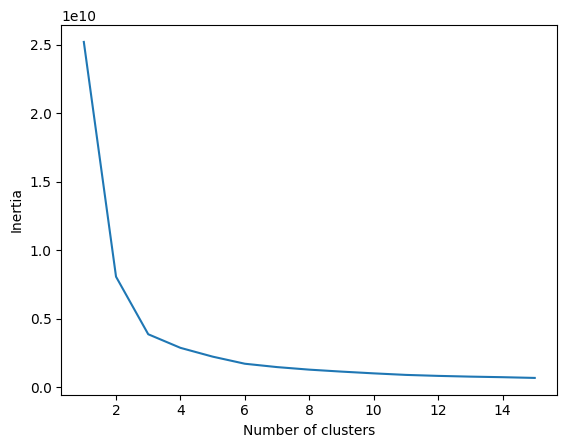

In [190]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(4, inertia[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Inertia') 
plt.show()

In [191]:
# 10 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(pca_3, clusters)

Inertia:  1003073443.7811246
Davies-Bouldin Score: 0.7449347172072045
Calinski-Harabasz Score: 25698.961174994693
Accuracy: 0.28520796414051913
Silhouette Score: 0.8059037216836995


0.8059037216836995

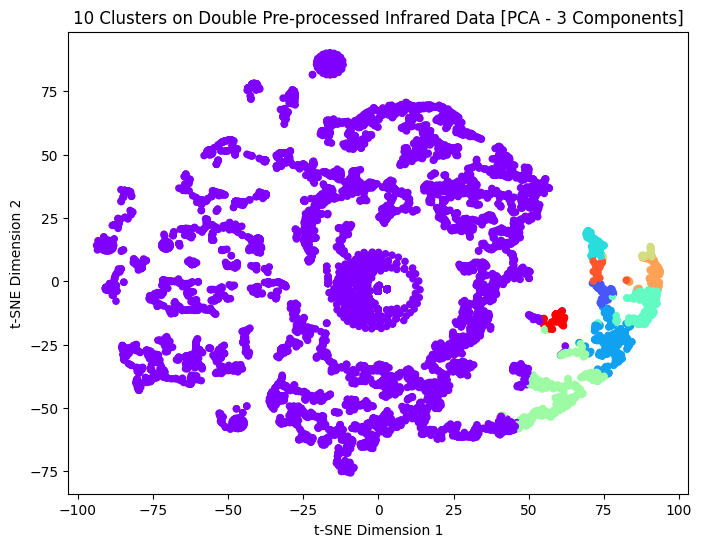

In [192]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [193]:
# 2 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(y_train, clusters, 2)
silhouetteScore(pca_3, clusters)

Inertia:  8064329532.3701515
Davies-Bouldin Score: 0.5666139535751682
Calinski-Harabasz Score: 20394.836190980375
Accuracy: 0.25935578025643696
Silhouette Score: 0.8916198226061289


0.8916198226061289

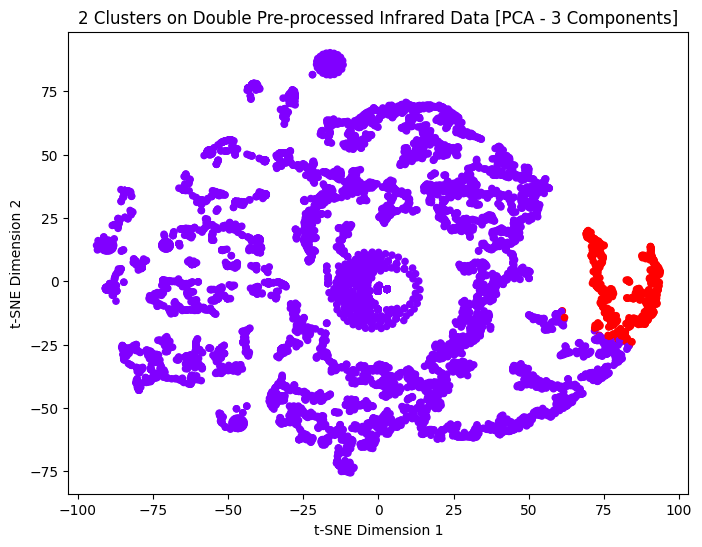

In [194]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [195]:
# 5 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(y_train, clusters, 5)
silhouetteScore(pca_3, clusters)

Inertia:  2224059693.1246347
Davies-Bouldin Score: 0.7505944549177513
Calinski-Harabasz Score: 24776.71433519783
Accuracy: 0.2785364328155947
Silhouette Score: 0.8309704013443743


0.8309704013443743

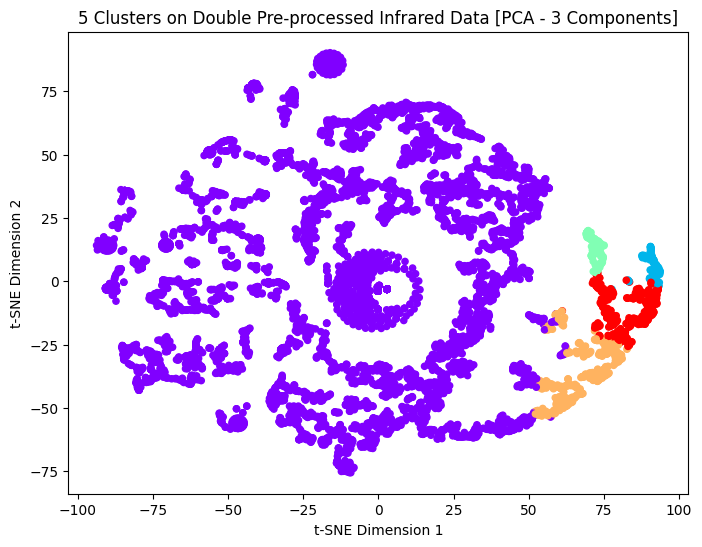

In [196]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [197]:
import umap.umap_ as umap

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create a UMAP (Uniform Manifold Approximation and Projection) model with 2 components
umap_model = umap.UMAP(n_components=2)

# Apply UMAP dimensionality reduction to the data, resulting in 'reduced_data'
reduced_data = umap_model.fit_transform(data_df)

In [198]:
# 10 clusters on the UMAP reduced data.

clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(reduced_data, clusters)

Inertia:  57924.75
Davies-Bouldin Score: 0.6071225335934045
Calinski-Harabasz Score: 16127.743028767081
Accuracy: 0.31595955384134267
Silhouette Score: 0.5360303


0.5360303

In [199]:
from sklearn.random_projection import GaussianRandomProjection

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create a GaussianRandomProjection model with 1000 components
rp = GaussianRandomProjection(n_components=1000)

# Apply Gaussian random projection to the data, resulting in 'reduced_data'
reduced_data = rp.fit_transform(data_df)

In [200]:
# 10 clusters on the Gaussian Random Projection reduced data.

clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
accuracy_metric(y_train, clusters, 10)
silhouetteScore(reduced_data, clusters)

Inertia:  3768953955.486641
Davies-Bouldin Score: 1.3483923548623955
Calinski-Harabasz Score: 7046.672975324172
Accuracy: 0.2893776712185969
Silhouette Score: 0.7643185250136612


0.7643185250136612

In [201]:
from sklearn.manifold import Isomap

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create an Isomap (Isometric Mapping) model with 50 components
isomap = Isomap(n_components=50)

# Apply Isomap dimensionality reduction to the data, resulting in 'reduced_data'
reduced_data = isomap.fit_transform(data_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [202]:
iso_df = prepped_infrared_df2.copy()

In [203]:
# Repeat the same process with 2 components instead this time.

isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [204]:
# 10 clusters on the Isomap reduced data.

# y_train = y_train.copy()÷

clusters_10 = kmeansfunc(iso_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(iso_data, clusters_10)
calinski_score(iso_data, clusters_10)
accuracy_metric(y_train, clusters_10, 10)
silhouetteScore(iso_data, clusters_10)

Inertia:  5945987093.679796
Davies-Bouldin Score: 0.7589924808997021
Calinski-Harabasz Score: 22762.873358971705
Accuracy: 0.27791097675388304
Silhouette Score: 0.8479174738826468


0.8479174738826468

In [205]:
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Ensure that y_train and clusters are NumPy arrays
# y_train = np.asarray(y_train)
# cl = clusters_10.copy()  # Create a copy of the cluster labels

# # Initialize an array to store adjusted cluster labels
# adjusted_clusters = np.copy(cl)

# # Calculate the overall distribution of class labels in the entire dataset
# label_distribution = np.bincount(y_train.flatten())

# for cluster_id in range(10):
#     # Get the indices of data points belonging to the current cluster
#     cluster_indices = np.where(cl == cluster_id)[0]
    
#     if len(cluster_indices) > 0:
#         # Extract ground truth labels for the data points in the current cluster
#         cluster_labels = y_train[cluster_indices]
        
#         # Calculate the distribution of class labels within the cluster
#         cluster_label_distribution = np.bincount(cluster_labels.flatten())
        
#         # Find the label that appears most frequently within the cluster
#         most_frequent_label = np.argmax(cluster_label_distribution)
        
#         # Find the label that is most frequent in the entire dataset
#         most_frequent_global_label = np.argmax(label_distribution)
        
#         # If the most frequent label within the cluster is not the most frequent globally, use it
#         if most_frequent_label != most_frequent_global_label:
#             adjusted_clusters[cluster_indices] = most_frequent_label

# # Calculate accuracy using adjusted cluster labels
# accuracy = accuracy_score(y_train_no_outliers, adjusted_clusters)

# print(f"Clustering Accuracy: {accuracy}")
# print(adjusted_clusters)


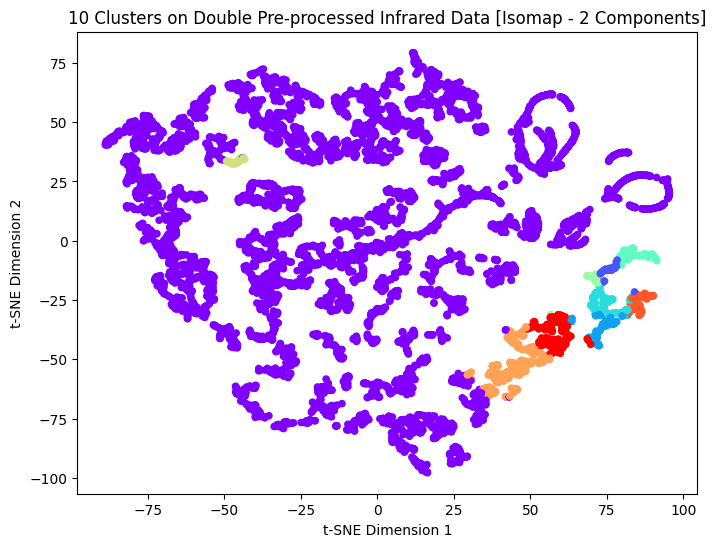

In [206]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [209]:
# 2 clusters on the Isomap reduced data.

clusters_2 = kmeansfunc(iso_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(iso_data, clusters_2)
calinski_score(iso_data, clusters_2)
accuracy_metric(y_train, clusters_2, 2)
silhouetteScore(iso_data, clusters_2)

Inertia:  44583064876.33231
Davies-Bouldin Score: 0.5549164990744828
Calinski-Harabasz Score: 19033.650089295134
Accuracy: 0.2553945585322631
Silhouette Score: 0.910952222580014


0.910952222580014

In [210]:
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Ensure that y_train and clusters are NumPy arrays
# y_train = np.asarray(y_train)
# cl = clusters_2.copy()  # Create a copy of the cluster labels

# # Initialize an array to store adjusted cluster labels
# adjusted_clusters = np.copy(cl)

# # Calculate the overall distribution of class labels in the entire dataset
# label_distribution = np.bincount(y_train.flatten())

# for cluster_id in range(10):
#     # Get the indices of data points belonging to the current cluster
#     cluster_indices = np.where(cl == cluster_id)[0]
    
#     if len(cluster_indices) > 0:
#         # Extract ground truth labels for the data points in the current cluster
#         cluster_labels = y_train[cluster_indices]
        
#         # Calculate the distribution of class labels within the cluster
#         cluster_label_distribution = np.bincount(cluster_labels.flatten())
        
#         # Find the label that appears most frequently within the cluster
#         most_frequent_label = np.argmax(cluster_label_distribution)
        
#         # Find the label that is most frequent in the entire dataset
#         most_frequent_global_label = np.argmax(label_distribution)
        
#         # If the most frequent label within the cluster is not the most frequent globally, use it
#         if most_frequent_label != most_frequent_global_label:
#             adjusted_clusters[cluster_indices] = most_frequent_label

# # Calculate accuracy using adjusted cluster labels
# accuracy = accuracy_score(y_train, adjusted_clusters)

# print(f"Clustering Accuracy: {accuracy}")
# print(adjusted_clusters)


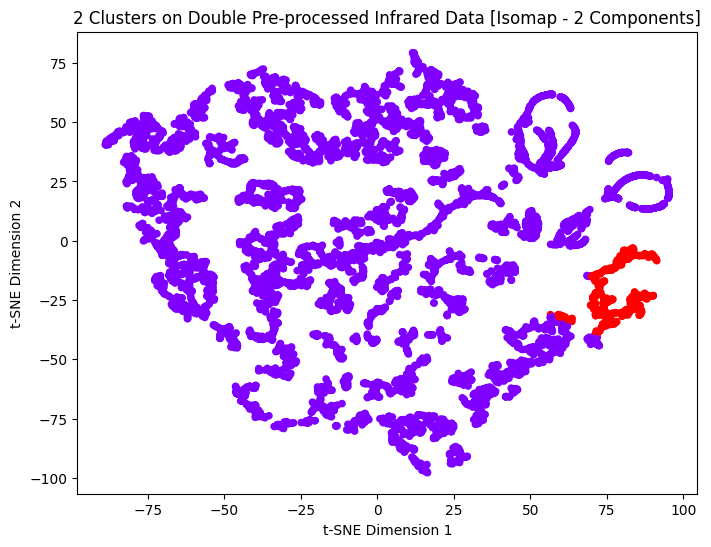

In [211]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [212]:
# 5 clusters on the Isomap reduced data.

clusters_5 = kmeansfunc(iso_data, 5)
clusters_5 = clusters_5.to_numpy().ravel()
db_score(iso_data, clusters_5)
calinski_score(iso_data, clusters_5)
accuracy_metric(y_train, clusters_5, 5)
silhouetteScore(iso_data, clusters_5)

Inertia:  12390569773.287977
Davies-Bouldin Score: 0.6254195921201628
Calinski-Harabasz Score: 23343.855274086967
Accuracy: 0.2673824663817367
Silhouette Score: 0.879148817657446


0.879148817657446

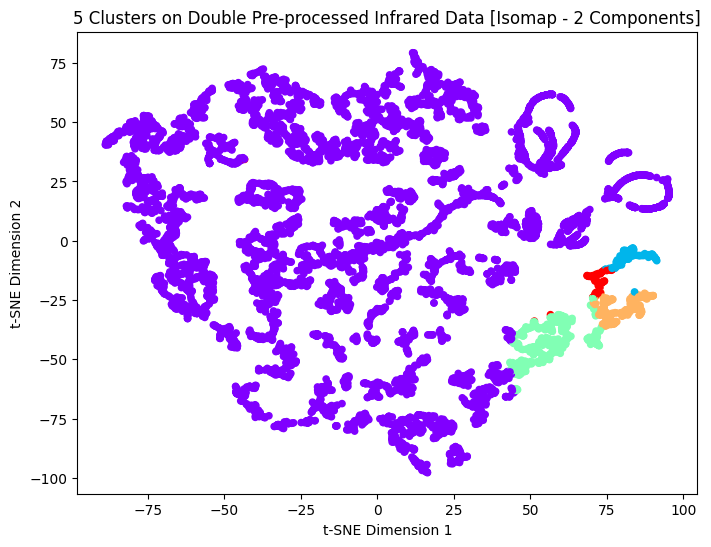

In [213]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_5, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

<div style="text-align: center;">

## Highest silhouette scores thus far:

#### 10 clusters - 0.9750181505494335 (Initial score - 0.14337657005172605)
#### 8 clusters - 0.9743239952747715 (Initial score - 0.15572181678470226)
#### 6 clusters - 0.9731338122205031 (Initial score - 0.20639571486279004)
#### 4 clusters - 0.9903732291634489 (Initial score - 0.3119771748068869)
#### 2 clusters - 0.845465747890616 (Initial score - 0.3568434794605163)

In [214]:
# Define a function to intensify image data based on percentiles
def lp_intensify(arr, lower_percentile, upper_percentile):
    # Calculate the lower and upper intensity limits based on percentiles
    lower_limit = np.percentile(arr, lower_percentile)
    upper_limit = np.percentile(arr, upper_percentile)
    
    # Set values in 'arr' below the lower limit to 0 and values above the upper limit to 255
    arr[arr < lower_limit] = 0
    arr[arr > upper_limit] = 255
    
    return arr

# Copy data from 'iso_data' into 'data'
data = iso_data.copy()

# Intensify the data using the 'lp_intensify' function with lower and upper percentiles of 87 and 90
lower_frequency_data = lp_intensify(data, 87, 90)

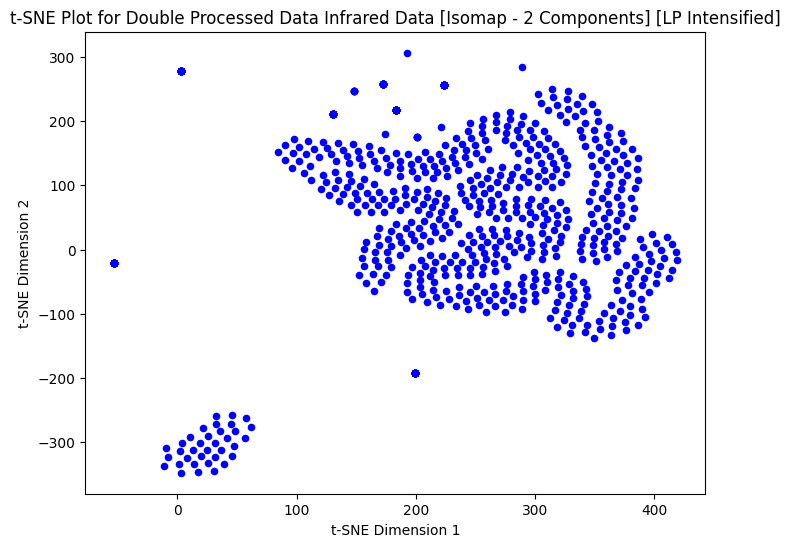

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the Double Processed Data Infrared Data [Isomap - 2 Components] with the lower pixels intensified.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [218]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    graph_clusters = kmeans.fit_predict(lower_frequency_data)
    graph_clusters = graph_clusters.flatten()
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(lower_frequency_data, graph_clusters)
    silhouette_scores.append(score)

Silhouette Score: 0.8454657478906161
Silhouette Score: 0.9559656747743791
Silhouette Score: 0.9903732291634493
Silhouette Score: 0.9717017101442617
Silhouette Score: 0.9731338122205041
Silhouette Score: 0.9736928880391771
Silhouette Score: 0.974323995274776
Silhouette Score: 0.9742042201062595
Silhouette Score: 0.975018150549444
Silhouette Score: 0.9736149826639735
Silhouette Score: 0.9727651975086318
Silhouette Score: 0.973281922417721
Silhouette Score: 0.9733983070155795
Silhouette Score: 0.972690010700347


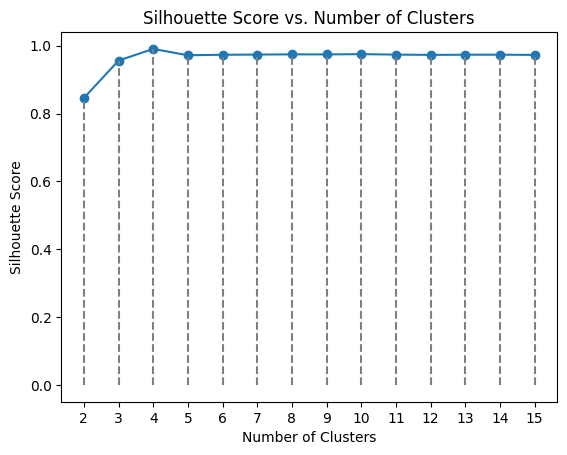

In [219]:
# Plotting the silhouette scores against the number of clusters.

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

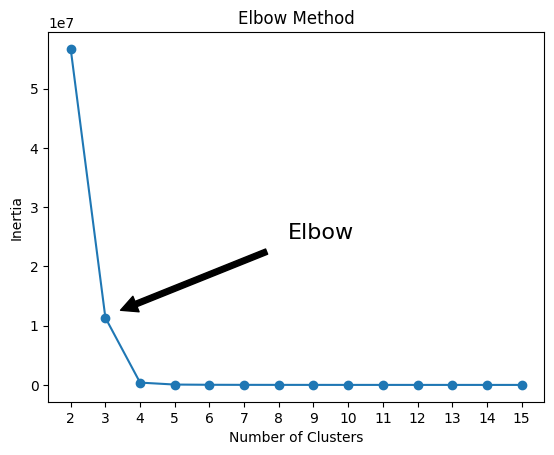

In [220]:
plt.plot(cluster_range, inertia, marker='o')
plt.xticks(cluster_range)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow',
             xy=(2.9, inertia[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Elbow Method')
plt.show()

In [221]:
# 2 clusters on the data with the lower pixels intensified.

clusters_2 = kmeansfunc(lower_frequency_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(lower_frequency_data, clusters_2)
calinski_score(lower_frequency_data, clusters_2)
accuracy_metric(y_train, clusters_2, 2)
silhouetteScore(lower_frequency_data, clusters_2)

Inertia:  56696803.32663623
Davies-Bouldin Score: 0.405532025018941
Calinski-Harabasz Score: 15514.451471684244
Accuracy: 0.23277389763369125
Silhouette Score: 0.8454657478906161


0.8454657478906161

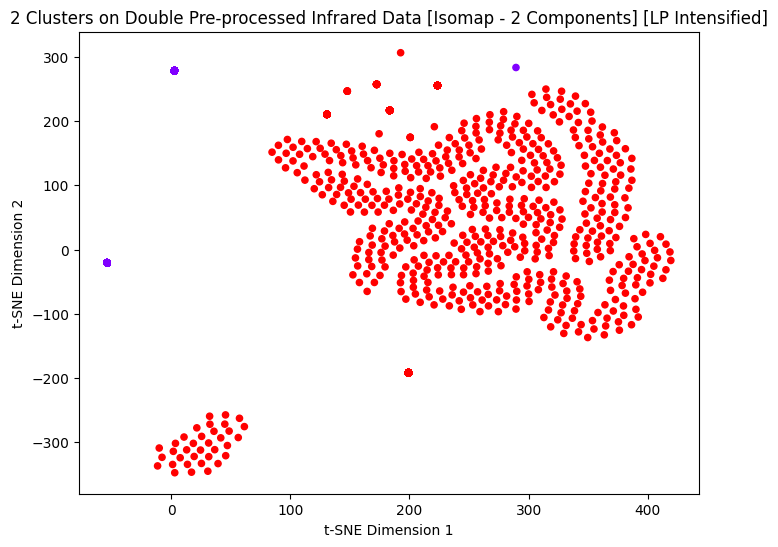

In [222]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [223]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)
calinski_score(lower_frequency_data, clusters_4)
accuracy_metric(y_train, clusters_4, 4)
silhouetteScore(lower_frequency_data, clusters_4)

Inertia:  392728.4241888742
Davies-Bouldin Score: 0.056269597107909
Calinski-Harabasz Score: 1204679.930237615
Accuracy: 0.2714479307828625
Silhouette Score: 0.9903732291634493


0.9903732291634493

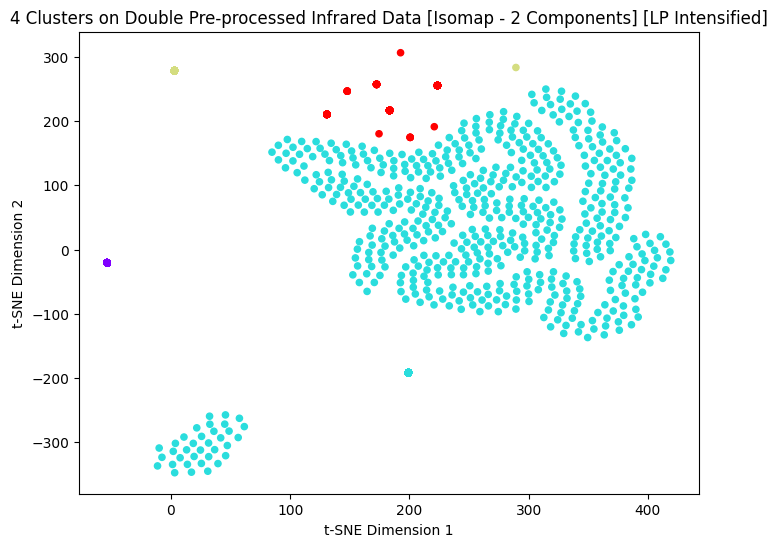

In [224]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_4, cmap='rainbow', s=20)
plt.title('4 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [225]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)
calinski_score(lower_frequency_data, clusters_6)
accuracy_metric(y_train, clusters_6, 6)
silhouetteScore(lower_frequency_data, clusters_6)

Inertia:  24317.701531932482
Davies-Bouldin Score: 0.233359951087075
Calinski-Harabasz Score: 11701085.03389418
Accuracy: 0.27238611487543
Silhouette Score: 0.9731338122205041


0.9731338122205041

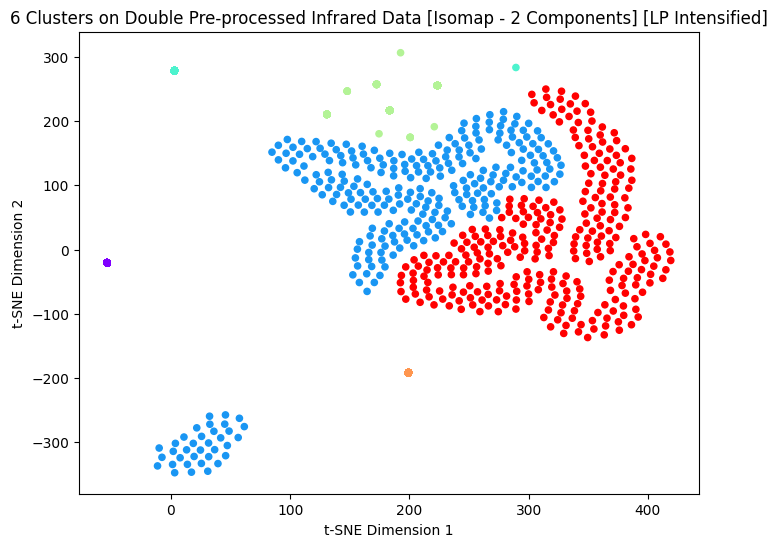

In [226]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_6, cmap='rainbow', s=20)
plt.title('6 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [227]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)
calinski_score(lower_frequency_data, clusters_8)
accuracy_metric(y_train, clusters_8, 8)
silhouetteScore(lower_frequency_data, clusters_8)

Inertia:  8454.905735559747
Davies-Bouldin Score: 0.27092186290168685
Calinski-Harabasz Score: 24055757.46221024
Accuracy: 0.27322005629104557
Silhouette Score: 0.974323995274776


0.974323995274776

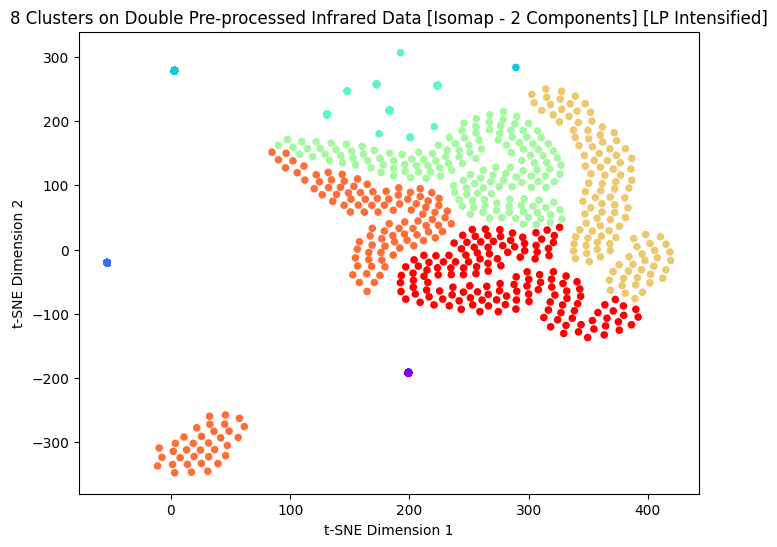

In [228]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_8, cmap='rainbow', s=20)
plt.title('8 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [229]:
# 10 clusters on the data with the lower pixels intensified.

clusters_10 = kmeansfunc(lower_frequency_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)
calinski_score(lower_frequency_data, clusters_10)
accuracy_metric(y_train, clusters_10, 10)
silhouetteScore(lower_frequency_data, clusters_10)

Inertia:  4432.314787374202
Davies-Bouldin Score: 0.2569405193643254
Calinski-Harabasz Score: 35662113.1911225
Accuracy: 0.2730115709371417
Silhouette Score: 0.975018150549444


0.975018150549444

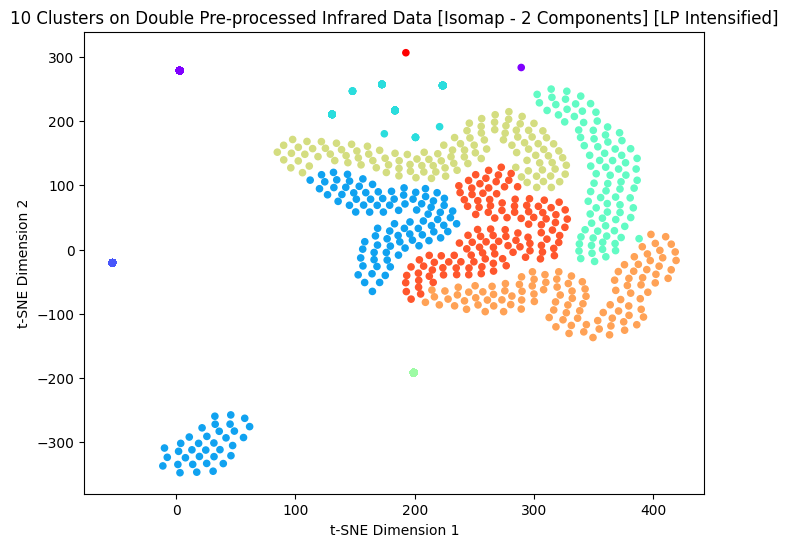

In [230]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

<div style="text-align: center;">

## Highest Accuracies

#### 10 clusters [Infrared Data Without Outliers] - 0.35796935265297614
#### 10 clusters [Raw Infrared Data] - 0.35541795665634673
#### 10 clusters [Raw Data]- 0.3569659442724458
#### 10 clusters [Normalized Infrared Data without Outliers]- 0.3471281142499739
#### 10 clusters [Scaled Data] - 0.34076931095590535

In [301]:
# 10 clusters on the Infrared Data without outliers

clusters = kmeansfunc(infra_no_outliers, 10, False)
clusters = clusters.to_numpy().ravel()

accuracy_metric(y_train, clusters, 10)

Accuracy: 0.35796935265297614


In [302]:
# 10 clusters on the Raw Infrared Data

clusters = kmeansfunc(infrared_df_org, 10, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(y_train_outliers, clusters, 10)

Accuracy: 0.35541795665634673


In [303]:
# 10 clusters on the Raw Data

clusters_raw10 = kmeansfunc(raw_data, 10, False)
clusters_raw10 = clusters_raw10.to_numpy().ravel()
accuracy_metric(y_train_outliers, clusters_raw10, 10)

Accuracy: 0.3569659442724458


In [299]:
# 10 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm, 10, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(y_train, clusters, 10)

Inertia:  8628579.582745984
Accuracy: 0.3471281142499739


In [300]:
# 10 clusters on the scaled data.

clusters = kmeansfunc(scaled_data_normalized, 10, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(y_train, clusters, 10)

Accuracy: 0.34076931095590535


<div style="text-align: center;">

## Lowest Davies-Bouldin Scores

#### 4 clusters [LP Intensified] - 0.056269597108027716
#### 6 clusters [LP Intensified] - 0.23335995108716268
#### 10 clusters [LP Intensified] - 0.2569405193650836
#### 8 clusters [LP Intensified] - 0.27092186290129194
#### 2 clusters [LP Intensified] - 0.40553202501894076

</div>

In [238]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4, False)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)

Davies-Bouldin Score: 0.056269597107909


0.056269597107909

In [239]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6, False)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)

Davies-Bouldin Score: 0.233359951087075


0.233359951087075

In [240]:
# 10 clusters on the data with the lower pixels intensified.

clusters_10 = kmeansfunc(lower_frequency_data, 10, False)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)

Davies-Bouldin Score: 0.2569405193643254


0.2569405193643254

In [241]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8, False)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)

Davies-Bouldin Score: 0.27092186290168685


0.27092186290168685

In [242]:
# 2 clusters on the data with the lower pixels intensified.

clusters_2 = kmeansfunc(lower_frequency_data, 2, False)
clusters_2 = clusters_2.to_numpy().ravel()

db_score(lower_frequency_data, clusters_2)

Davies-Bouldin Score: 0.405532025018941


0.405532025018941

<div style="text-align: center;">

## Highest Calinski Score

#### 10 clusters [LP Intensified] - 35662113.191129856
#### 8 clusters [LP Intensified] - 24055757.46221078
#### 6 clusters [LP Intensified] - 11701085.033894196
#### 4 clusters [LP Intensified] - 1204679.930237563
#### 10 clusters [3 component PCA double-processed pseudo-infrared] - 25698.961011968197

In [243]:
# 10 clusters on the data with the lower pixels intensified.

clusters_10 = kmeansfunc(lower_frequency_data, 10, False)
clusters_10 = clusters_10.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_10)

Calinski-Harabasz Score: 35662113.1911225


35662113.1911225

In [244]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8, False)
clusters_8 = clusters_8.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_8)

Calinski-Harabasz Score: 24055757.46221024


24055757.46221024

In [245]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6, False)
clusters_6 = clusters_6.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_6)

Calinski-Harabasz Score: 11701085.03389418


11701085.03389418

In [246]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4, False)
clusters_4 = clusters_4.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_4)

Calinski-Harabasz Score: 1204679.930237615


1204679.930237615

In [247]:
# 10 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 10, False)
clusters = clusters.to_numpy().ravel()
calinski_score(pca_3, clusters)

Calinski-Harabasz Score: 25698.961174994693


25698.961174994693

# Hard Clustering

Mujtaba's code here

### Visualise


In [ ]:
# Function to plot T-SNE graphs.
# Takes the dataframe,predicted labels and title of graph as parameters
# Plots graph
def TSNEplots(data,clusterlabels,title):
    
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)

    dataTSNE = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(dataTSNE[:, 0], dataTSNE[:, 1], c=clusterlabels,cmap="rainbow", s=20)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

In [ ]:
def accuracy_metric(y_train, cluster_labels):
    data = []
    labels = []
    

    for cluster_label in np.unique(cluster_labels):
        cluster_mask = (cluster_labels == cluster_label)
        # X_cluster = testing_df[cluster_mask]
        y_cluster = y_train[cluster_mask].flatten()
        majority_class = np.bincount(y_cluster).argmax()

        for unique_class in y_cluster:
            class_size = np.sum(y_cluster == unique_class)

        # data.append(X_cluster)
        labels.append(y_cluster)

    # data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels)
        
    accuracy = accuracy_score(y_train, labels)
    print("Accuracy:", accuracy)
    return accuracy

### Create Clustering Algos


In [ ]:
from sklearn.cluster import DBSCAN,AgglomerativeClustering,Birch

##### Agglomerative Clustering

In [ ]:
# function to apply AgglomerativeClustering on df
# takes df and num of clusters as parameters
# returns predicted labels
def aggfunc(data, k):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    clusters = agg_clustering.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    
    return clusters

In [ ]:
# apply clustering algorithm to df with 10 clusters
agg_10_clusters_labels = aggfunc(x_train,10) 

In [ ]:
# obtain performance metrics
silhouetteScore(x_train,agg_10_clusters_labels)
calinski_score(x_train,agg_10_clusters_labels)
db_score(x_train,agg_10_clusters_labels)
# accuracy_metric(y_train,agg_10_clusters_labels)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1597.112499243934


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.9524809759953623

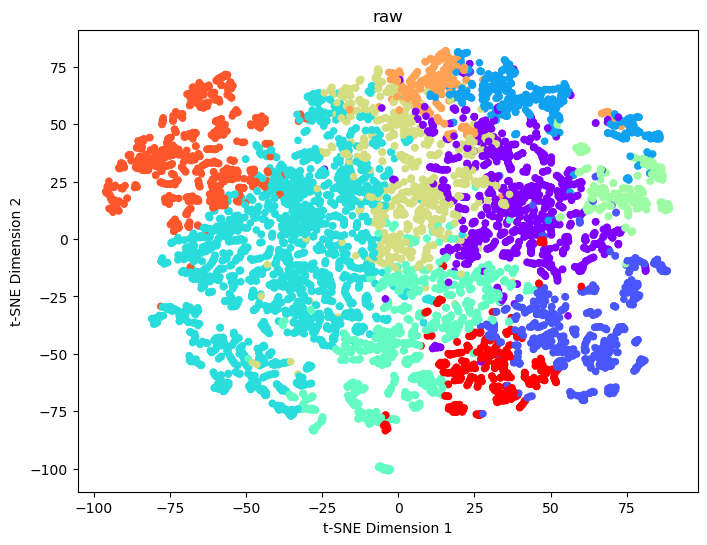

In [ ]:
# plot TSNE graph
TSNEplots(x_train.to_numpy(),agg_10_clusters_labels,"raw") 

In [ ]:
silhouetteScoreAllRaw = [] 
calinskiScoreAllRaw = [] 
dbScoreAllRaw = [] 

# for loop to obtain performance metrics with different numbers of clusters
#  Raw data
for i in range(2, 12): 
    # get labels with i number of clusters
    raw_labels_pred = aggfunc(x_train,i)
    # append score to list
    silhouetteScoreAllRaw.append(silhouetteScore(x_train,raw_labels_pred))
    calinskiScoreAllRaw.append(calinski_score(x_train,raw_labels_pred))
    dbScoreAllRaw.append(db_score(x_train,raw_labels_pred))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3532791090619684


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1879831451772538


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.19888231502242126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.20393837995988515


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.21153913098707894


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1983724831499671


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2006722206263219


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.0941067338452834


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08785947340116355


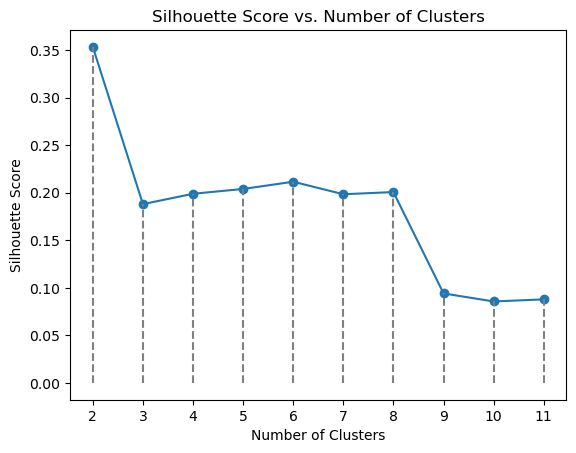

In [ ]:
# Plot silhouette Scores against different number of clusters
# Raw data
cluster_range = range(2, 12)
plt.plot(cluster_range, silhouetteScoreAllRaw, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouetteScoreAllRaw[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
# apply clustering algorithm to df converted to infrared with 10 clusters
agg_10_clusters_labels_infra = aggfunc(infrared_df_org,10)

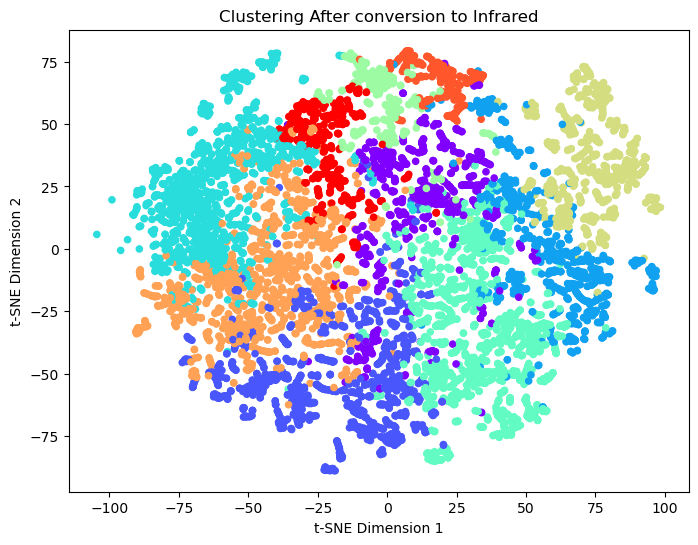

In [ ]:
# plot TSNE graph
TSNEplots(infrared_df_org,agg_10_clusters_labels_infra,"Clustering After conversion to Infrared")

In [ ]:
# obtain performance metrics
silhouetteScore(infrared_df_org,agg_10_clusters_labels_infra)
calinski_score(x_train,agg_10_clusters_labels)
db_score(x_train,agg_10_clusters_labels)
# accuracy_metric(y_train,agg_10_clusters_labels_infra)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.10424093019253086


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1597.112499243934


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Score: 1.9524809759953623


1.9524809759953623

In [ ]:
# apply clustering algorithm to df converted to infrared and no outliers with 10 clusters
clusters_infra_no_outliers = aggfunc(infra_no_outliers, 10)
# obtain performance metrics
silhouetteScore(infra_no_outliers,clusters_infra_no_outliers)
calinski_score(infra_no_outliers,clusters_infra_no_outliers)
db_score(infra_no_outliers,clusters_infra_no_outliers)
# accuracy_metric(y_train,clusters_infra_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08265232233522116


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1516.0316693513314


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Score: 2.105330645937184


2.105330645937184

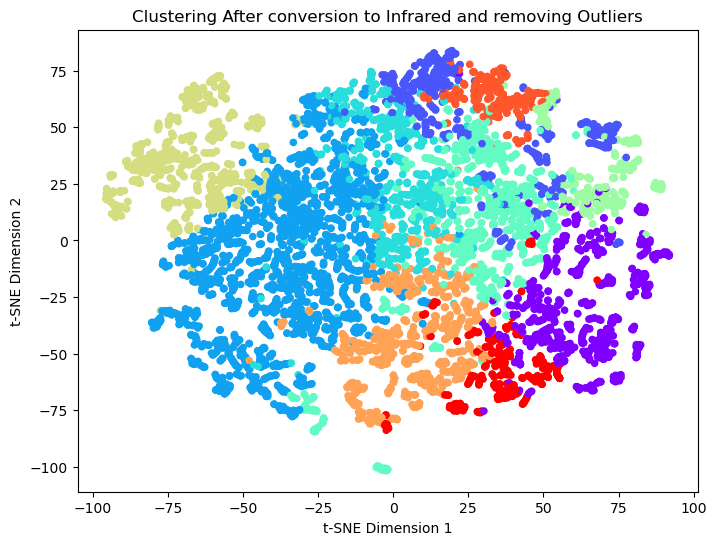

In [ ]:
# plot TSNE graph
TSNEplots(infra_no_outliers,clusters_infra_no_outliers,"Clustering After conversion to Infrared and removing Outliers")

In [ ]:
# apply Clustering After Normalisation with 10 clusters
clusters_infra_norm = aggfunc(infra_norm, 10)
# obtain performance metrics
silhouetteScore(infra_norm,clusters_infra_norm)
calinski_score(infra_norm,clusters_infra_norm)
db_score(infra_norm,clusters_infra_norm)
# accuracy_metric(y_train,clusters_infra_norm)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08682438504803372


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1466.2636484034615


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Score: 2.047624952777414


2.047624952777414

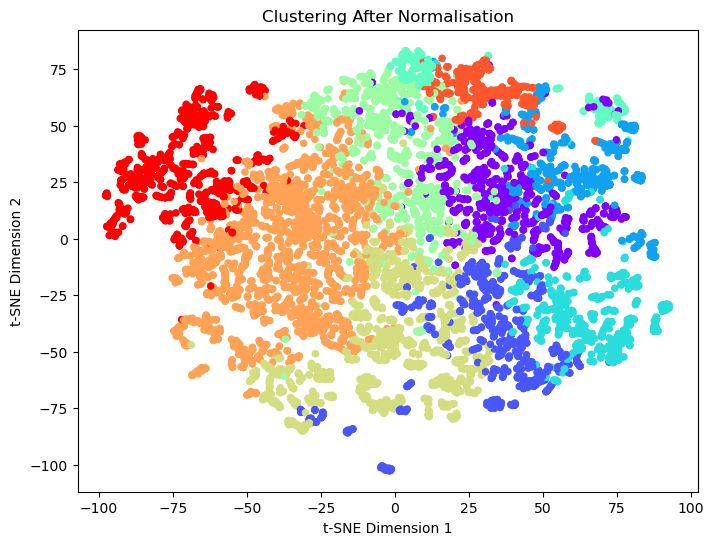

In [ ]:
# plot TSNE graph
TSNEplots(infra_norm,clusters_infra_norm,"Clustering After Normalisation")

In [ ]:
# apply Clustering After first normalising and then applying Infrared conversion with 10 clusters
clusters_infrared_df_norm = aggfunc(infrared_df_norm, 10)
# obtain performance metric
silhouetteScore(infrared_df_norm,clusters_infrared_df_norm)
calinski_score(infrared_df_norm,clusters_infrared_df_norm)
db_score(infrared_df_norm,clusters_infrared_df_norm)
# accuracy_metric(y_train,clusters_infrared_df_norm)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46254749032402126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1496.1553167352206


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Score: 2.615637867182651


2.615637867182651

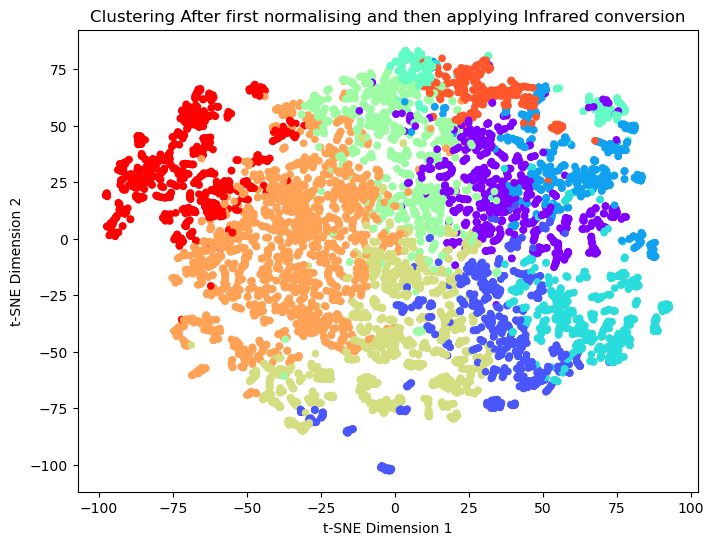

In [ ]:
# plot TSNE graph
TSNEplots(infra_norm,clusters_infra_norm,"Clustering After first normalising and then applying Infrared conversion")

In [ ]:
# Clustering After removing Outliers with 10 clusters
clusters_infra_norm_no_outliers = aggfunc(infra_norm_no_outliers, 10)
# obtain performance metrics
silhouetteScore(infra_norm_no_outliers,clusters_infra_norm_no_outliers)
calinski_score(infra_norm_no_outliers,clusters_infra_norm_no_outliers)
db_score(infra_norm_no_outliers,clusters_infra_norm_no_outliers)
accuracy_metric(y_train,clusters_infra_norm_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46638652388869367


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 1267.3185223811015
Davies-Bouldin Score: 2.5332983215861167


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.1964974460544147


0.1964974460544147

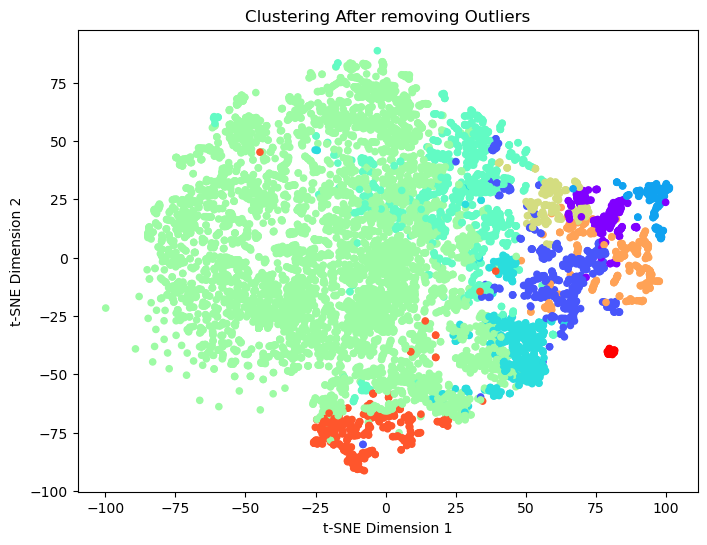

In [ ]:
# plot TSNE graph
TSNEplots(infra_norm_no_outliers,clusters_infra_norm_no_outliers,"Clustering After removing Outliers")

In [ ]:
silhouetteScoreAll = [] 

# for loop to obtain performance metrics with different numbers of clusters
# normalised and outlier mined data
for i in range(2, 15): 
    # get labels with i number of clusters
    clustersLabels = aggfunc(infra_norm_no_outliers,i)
    # append score to list
    silhouetteScoreAll.append(silhouetteScore(infra_norm_no_outliers,clustersLabels))


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.658983680565739


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6497470524049589


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5993403350000828


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.602393660684713


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4670504658963724


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46815855705203424


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.47154068178230957


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.465090706813612


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46638652388869367


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4646668602861849


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46346324923462934


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4633759228662821


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46489932057515354


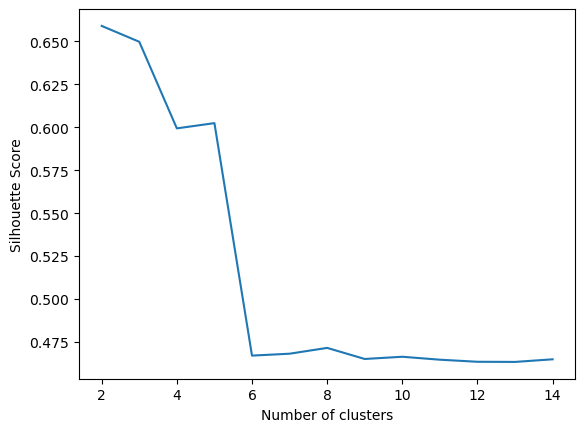

In [ ]:
# Plot silhouette Scores against different number of clusters
plt.plot(range(2, 15), silhouetteScoreAll)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score') 
plt.show()

In [ ]:
# Clustering After removing Outliers with 2 clusters
clusters_infra_norm_no_outliers_2 = aggfunc(infra_norm_no_outliers, 2)
silhouetteScore(infra_norm_no_outliers,clusters_infra_norm_no_outliers_2)
calinski_score(infra_norm_no_outliers,clusters_infra_norm_no_outliers_2)
db_score(infra_norm_no_outliers,clusters_infra_norm_no_outliers_2)
accuracy_metric(y_train,clusters_infra_norm_no_outliers_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.658983680565739


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Score: 5467.143129888462


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Score: 1.1788139171389898
Accuracy: 0.44396956113833


0.44396956113833

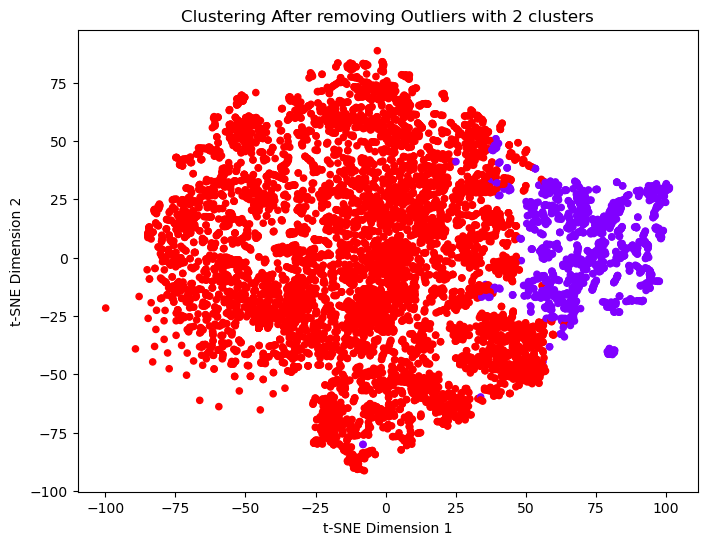

In [ ]:
# plot graph
TSNEplots(infra_norm_no_outliers,clusters_infra_norm_no_outliers_2,"Clustering After removing Outliers with 2 clusters")

In [ ]:
# Clustering After Preprocessing with 10 clusters
clusters_preprocessed = aggfunc(prepped_infrared_df, 10)
# obtain performance metric

silhouetteScore(prepped_infrared_df,clusters_preprocessed)
calinski_score(prepped_infrared_df,clusters_preprocessed)
db_score(prepped_infrared_df,clusters_preprocessed)
accuracy_metric(y_train,clusters_preprocessed)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.44571711187269836


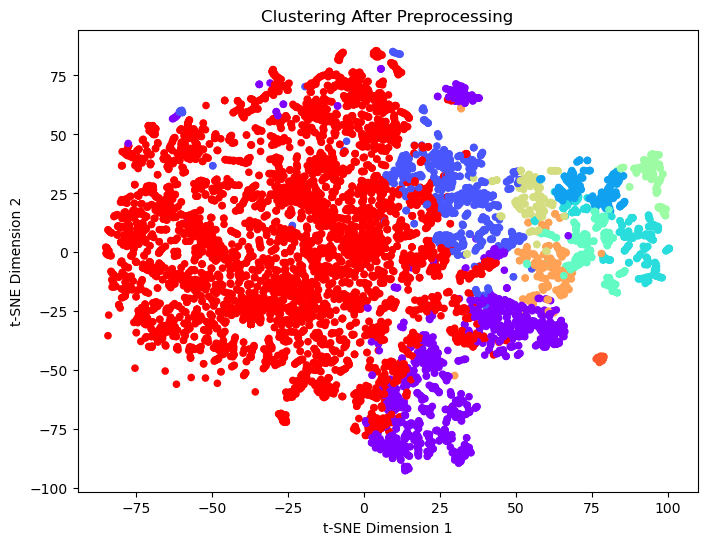

In [ ]:
# plot graph
TSNEplots(prepped_infrared_df,clusters_preprocessed,"Clustering After Preprocessing")

In [ ]:
# Clustering After Preprocessing (2 clusters)
clusters_preprocessed_2 = aggfunc(prepped_infrared_df, 2)
# obtain performance metric
silhouetteScore(prepped_infrared_df,clusters_preprocessed_2)
calinski_score(prepped_infrared_df,clusters_preprocessed_2)
db_score(prepped_infrared_df,clusters_preprocessed_2)
accuracy_metric(y_train,clusters_preprocessed_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6865004553787922


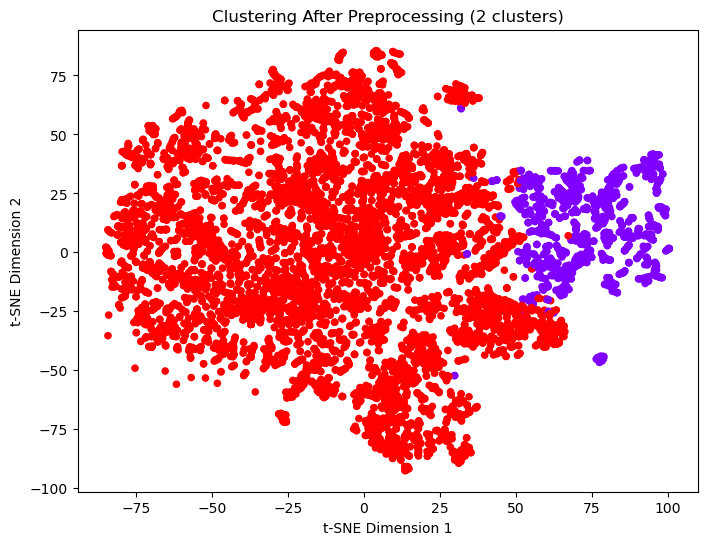

In [ ]:
# plot graph
TSNEplots(prepped_infrared_df,clusters_preprocessed_2,"Clustering After Preprocessing (2 clusters)")

In [ ]:
# apply pca on pre-processed data with 50 Components
df_pca_50 = PCAOnData(prepped_infrared_df, 50)
# apply clustering on df_pca_50 with 10 clusters
clusters_pca50 = aggfunc(df_pca_50, 10)
silhouetteScore(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
db_score(df_pca_50, clusters_pca50)
accuracy_metric(y_train,clusters_pca50)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.48610955106777737


In [ ]:
TSNEplots(df_pca_50,clusters_pca50,"clustering on df_pca_50 with 10 clusters")

In [ ]:
# apply clustering on double processed data with 10 clusters
clusters = aggfunc(prepped_infrared_df2, 10)
silhouetteScore(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
db_score(prepped_infrared_df2, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.786266646588159


In [ ]:
TSNEplots(prepped_infrared_df2,clusters,"clustering on double processed data with 10 clusters")

In [ ]:
# apply clustering on double processed data with 2 clusters
clusters = aggfunc(prepped_infrared_df2, 2)
silhouetteScore(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df, clusters)
db_score(prepped_infrared_df, clusters)
accuracy_metric(y_train,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6865004553787922


In [ ]:
TSNEplots(prepped_infrared_df2,clusters,"clustering on double processed data with 2 clusters")

In [ ]:
# apply pca on double pre-processed data with 50 Components
pca_50 = PCAOnData(prepped_infrared_df2, 50)

In [ ]:
# apply clustering on pca_50 with 10 clusters and obtain performance metric
clusters = aggfunc(pca_50, 10)
silhouetteScore(pca_50, clusters)
calinski_score(pca_50, clusters)
db_score(pca_50, clusters)
accuracy_metric(y_train,pca_50)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7872079356565395


In [ ]:
TSNEplots(pca_50,clusters,"clustering on pca_50 with 10 clusters ")

In [ ]:
# apply clustering on pca_50 with 5 clusters and obtain performance metric
clusters = aggfunc(pca_50, 5)
silhouetteScore(pca_50, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7992193949794117


In [ ]:
TSNEplots(pca_50,clusters,"clustering on pca_50 with 5 clusters ")

In [ ]:
# apply pca on double pre-processed data with 3 Components
pca_3 = PCAOnData(prepped_infrared_df2,3)

In [ ]:
# apply clustering on pca_3 with 2 clusters and obtain performance metric
clusters = aggfunc(pca_50, 2)
silhouetteScore(pca_50, clusters)
calinski_score(pca_50, clusters)
db_score(pca_50, clusters)
accuracy_metric(y_train,pca_3)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8664894784735309


In [ ]:
TSNEplots(pca_50,clusters,"clustering on pca_3 with 2 clusters ")

C:\Users\mujta\AppData\Local\Temp\ipykernel_9672\1976246888.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataTSNE[:, 0], dataTSNE[:, 1], c=clusterlabels,cmap="rainbow", s=20)


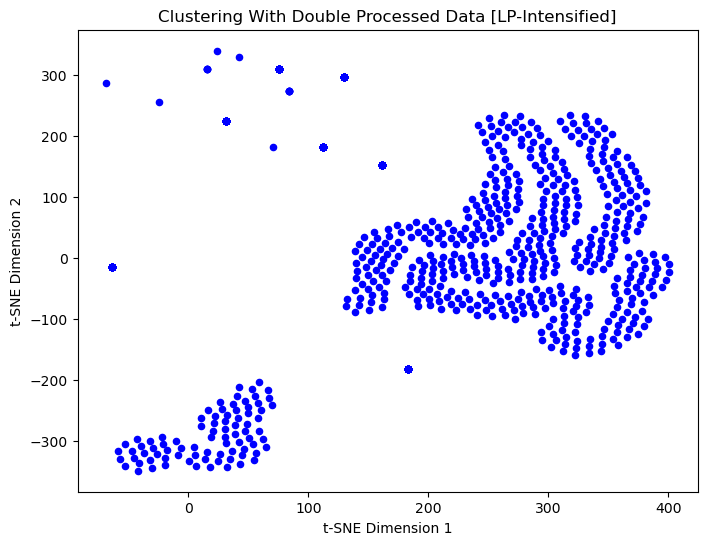

In [ ]:
# plot T-SNE graph for Clustering With Double Processed Data [LP-Intensified]
TSNEplots(lower_frequency_data.copy(),'b',"Clustering With Double Processed Data [LP-Intensified]")

In [ ]:
silhouetteScoreAll = [] 
calinskiScoreAllproc = [] 
dbScoreAllproc = [] 
# obtain silhouette Scores for final processed data by applying clustering for various number of clusters
lfd = lower_frequency_data.copy()
for i in range(2, 15): 
    
    clustersLabels = aggfunc(lfd,i)
    silhouetteScoreAll.append(silhouetteScore(lfd,clustersLabels))
    calinskiScoreAllproc.append(calinski_score(lfd,clustersLabels))
    dbScoreAllproc.append(db_score(lfd,clustersLabels))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8219683117859206


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9559656747743789


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9903732291634493


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9708006803981317


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9726766616035946


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9696134690118321


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9725839252383244


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9724330022560203


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.972801141885017


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9713207248331386


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9712409332420776


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9720436414574629


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9720435678515499


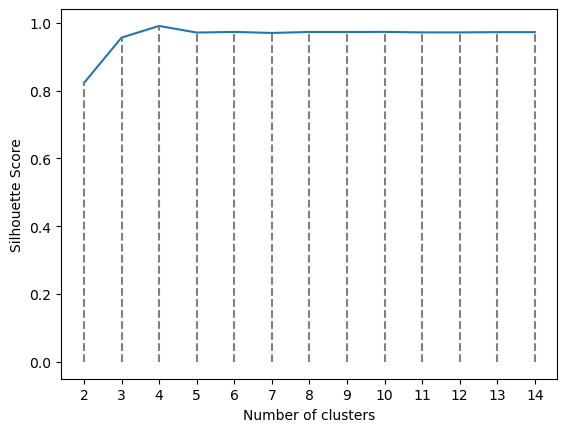

In [ ]:
# plot comparison 
plt.plot(range(2, 15), silhouetteScoreAll)
plt.xticks(range(2, 15))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score') 
clusterRange = range(2, 15)
for i in clusterRange:
    index = i - 2
    plt.plot([clusterRange[index], clusterRange[index]], [0, silhouetteScoreAll[index]], linestyle='--', color='gray')

plt.show()

In [ ]:
# create copy iso_data
testing_df = iso_data.copy()
# remove outliers from y_train
y_train = pd.read_csv('CompleteDataSet/y_train_all.csv')
y_train = y_train.drop(outlier_indices)
y_train = np.asarray(y_train)
# apply clustering
cluster_labels = aggfunc(testing_df,10)


In [ ]:
# obtain performance metrics
silhouetteScore(testing_df,cluster_labels)
calinski_score(testing_df,cluster_labels)
db_score(testing_df,cluster_labels)
accuracy_metric(y_train,cluster_labels)

In [ ]:
testing_df.shape

(9593, 2)

In [ ]:
y_train.shape

(9593, 1)

In [ ]:
# get accuracy
accuracy= accuracy_metric(y_train,cluster_labels)
accuracy

Accuracy: 0.6569373501511518


0.6569373501511518

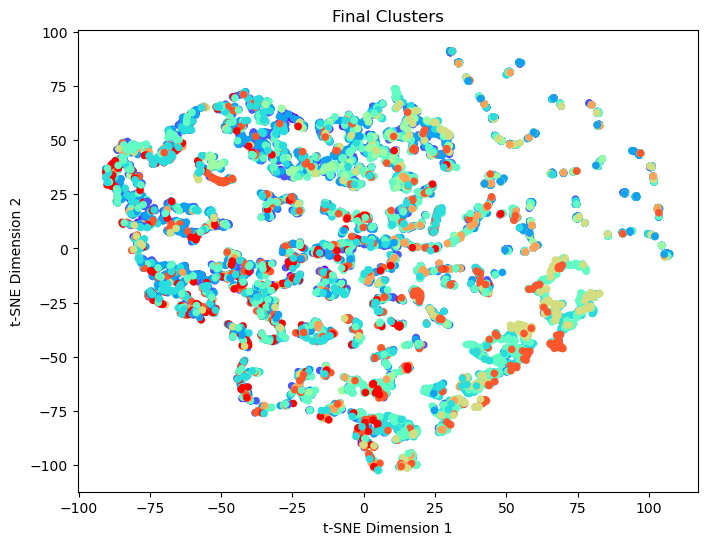

In [ ]:
# plot TSNE graph
TSNEplots(testing_df,cluster_labels,"Final Clusters")

In [ ]:
# obtain values of performance metrics on various clusters
raw_scores = silhouetteScoreAllRaw[::2]
processed_scores = silhouetteScoreAll[::2]
silhouette_bf = [raw_scores,processed_scores[0:5]]
calinski_bf = [calinskiScoreAllRaw[::2],(calinskiScoreAllproc[::2])[0:5]]
davies_bouldin_bf = [dbScoreAllRaw[::2],(dbScoreAllproc[::2])[0:5]]

# Comparision

In [ ]:
x_axis = ["Raw", "After Pre-processing"]
y_axis = ["2 Clusters", "4 Clusters", "6 Clusters", "8 Clusters", "10 Clusters"] 
pd.DataFrame(silhouette_bf, x_axis, y_axis)

2 Clusters  4 Clusters  6 Clusters  8 Clusters  \
Raw                     0.353279    0.198882    0.211539    0.200672   
After Pre-processing    0.821968    0.990373    0.972677    0.972584   

                      10 Clusters  
Raw                      0.085637  
After Pre-processing     0.972801

In [ ]:
pd.DataFrame(calinski_bf, x_axis, y_axis)

In [ ]:
pd.DataFrame(davies_bouldin_bf, x_axis, y_axis)

# Birch Clustering

In [ ]:
from sklearn.cluster import Birch


In [ ]:
# function to apply Birch clustering on df
# takes df and num of clusters as parameters
# returns predicted labels
def birchfunc(data,n_clusters):
    brc = Birch(threshold=0.3, branching_factor=50,n_clusters=n_clusters)
    clusters = brc.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    
    return clusters

In [ ]:
testing_df.shape

(9593, 3)

In [ ]:
# apply clustering algorithm to df with 10 clusters
birch_labels_raw = birchfunc(x_train,10)

In [ ]:
# obtain performance metrics
silhouetteScore(x_train,birch_labels_raw)
calinski_score(x_train,birch_labels_raw)
db_score(x_train,birch_labels_raw)
# accuracy_metric(y_train,birch_labels_raw)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


0.08563693469224311

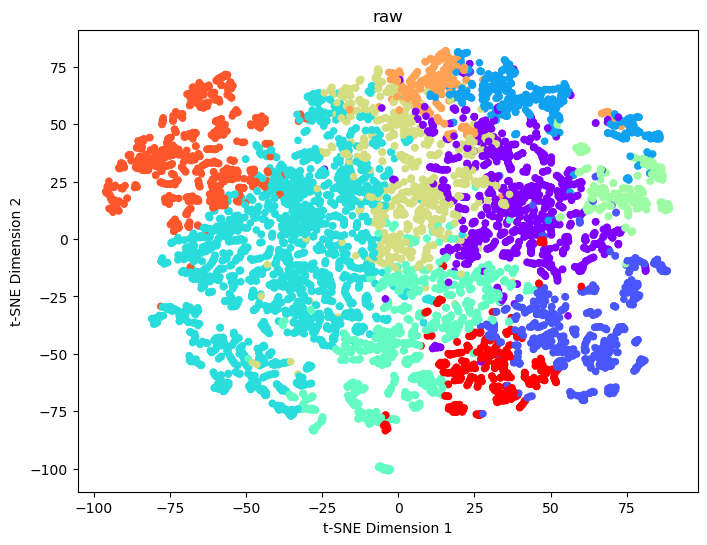

In [ ]:
# plot TSNE graph
TSNEplots(x_train.to_numpy(),birch_labels_raw,"raw")

In [ ]:
# apply clustering algorithm to df converted to infrared with 10 clusters
birch_labels_infra = birchfunc(infrared_df_org,10)

In [ ]:
# obtain performance metrics

silhouetteScore(infrared_df_org,birch_labels_infra)
calinski_score(infrared_df_org,birch_labels_infra)
db_score(infrared_df_org,birch_labels_infra)
# accuracy_metric(y_train,birch_labels_infra)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.14697351726416283


0.14697351726416283

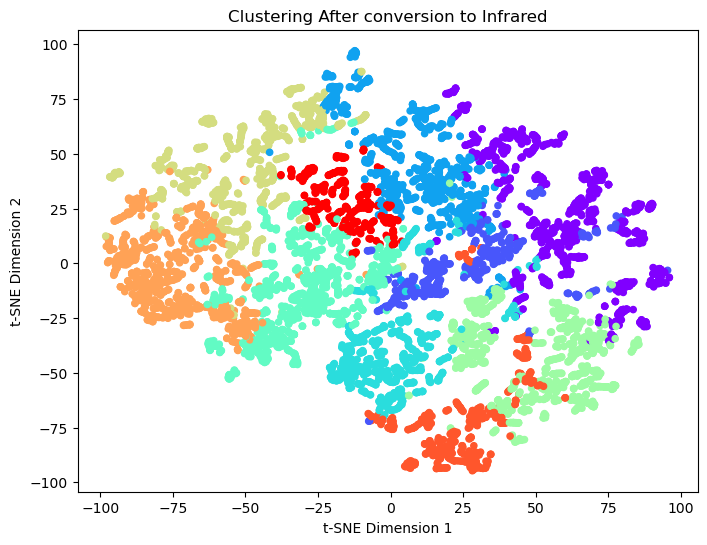

In [ ]:
# plot TSNE graph
TSNEplots(infrared_df_org,birch_labels_infra,"Clustering After conversion to Infrared")

In [ ]:
# apply clustering algorithm to df converted to infrared and no outliers with 10 clusters
birch_labels_infra_no_outliers = birchfunc(infra_no_outliers, 10)

In [ ]:
# obtain performance metrics
silhouetteScore(infra_no_outliers,birch_labels_infra_no_outliers)
calinski_score(infra_no_outliers,birch_labels_infra_no_outliers)
db_score(infra_no_outliers,birch_labels_infra_no_outliers)
accuracy_metric(y_train,birch_labels_infra_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08265232233522116


0.08265232233522116

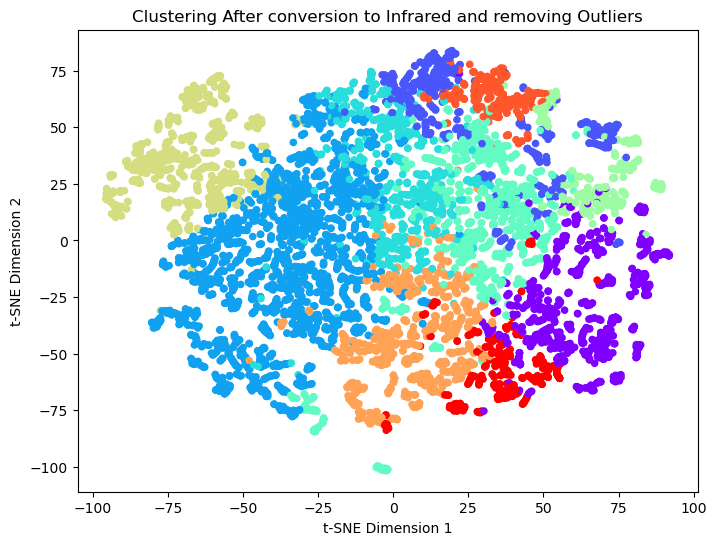

In [ ]:
# plot TSNE graph
TSNEplots(infra_no_outliers,birch_labels_infra_no_outliers,"Clustering After conversion to Infrared and removing Outliers")

In [ ]:
# apply Clustering After first normalising and then applying Infrared conversion with 10 clusters
birch_labels_infrared_df_norm = birchfunc(infrared_df_norm, 10)

In [ ]:
# obtain performance metric
silhouetteScore(infrared_df_norm,birch_labels_infrared_df_norm)
calinski_score(infrared_df_norm,birch_labels_infrared_df_norm)
db_score(infrared_df_norm,birch_labels_infrared_df_norm)
# accuracy_metric(y_train,birch_labels_infrared_df_norm)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.29379717360568686


0.29379717360568686

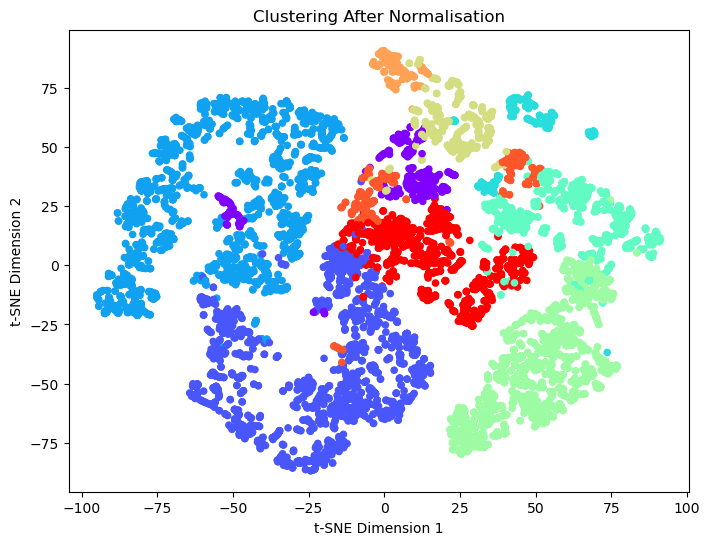

In [ ]:
# plot TSNE graph
TSNEplots(infrared_df_norm,birch_labels_infrared_df_norm,"Clustering After Normalisation")

In [ ]:
# Clustering After removing Outliers with 10 clusters
birch_labels_infrared_norm_no_outliers = birchfunc(infra_norm_no_outliers, 10)

In [ ]:
# obtain performance metrics

silhouetteScore(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers)
calinski_score(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers)
db_score(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers)
accuracy_metric(y_train,birch_labels_infrared_norm_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2908286104320689


0.2908286104320689

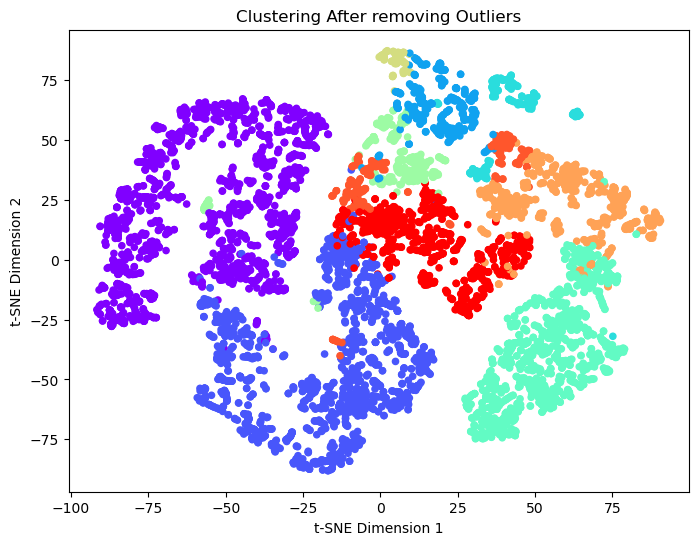

In [ ]:
# plot TSNE graph
TSNEplots(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers,"Clustering After removing Outliers")

In [ ]:
# Clustering After removing Outliers with 2 clusters
birch_infra_norm_no_outliers_2 = birchfunc(infra_norm_no_outliers, 2)


In [ ]:
# apply silhouetteScore
silhouetteScore(infra_norm_no_outliers,birch_infra_norm_no_outliers_2)
calinski_score(infra_norm_no_outliers,birch_infra_norm_no_outliers_2)
db_score(infra_norm_no_outliers,birch_infra_norm_no_outliers_2)
accuracy_metric(y_train,birch_infra_norm_no_outliers_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.43155433416909283


0.43155433416909283

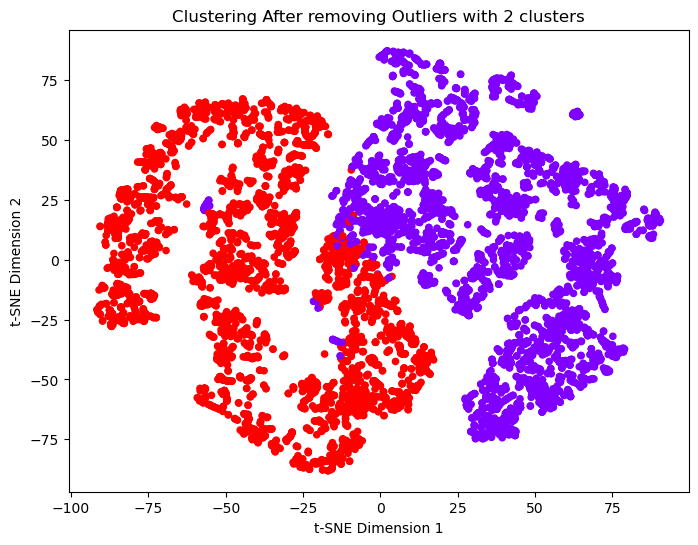

In [ ]:
# plot graph
TSNEplots(infra_norm_no_outliers,birch_infra_norm_no_outliers_2,"Clustering After removing Outliers with 2 clusters")

In [ ]:
# Clustering After Preprocessing with 10 clusters
birch_preprocessed = birchfunc(prepped_infrared_df, 10)


In [ ]:
# obtain performance metric
silhouetteScore(prepped_infrared_df,birch_preprocessed)
calinski_score(prepped_infrared_df,birch_preprocessed)
db_score(prepped_infrared_df,birch_preprocessed)
accuracy_metric(y_train,birch_preprocessed)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2694771753718034


0.2694771753718034

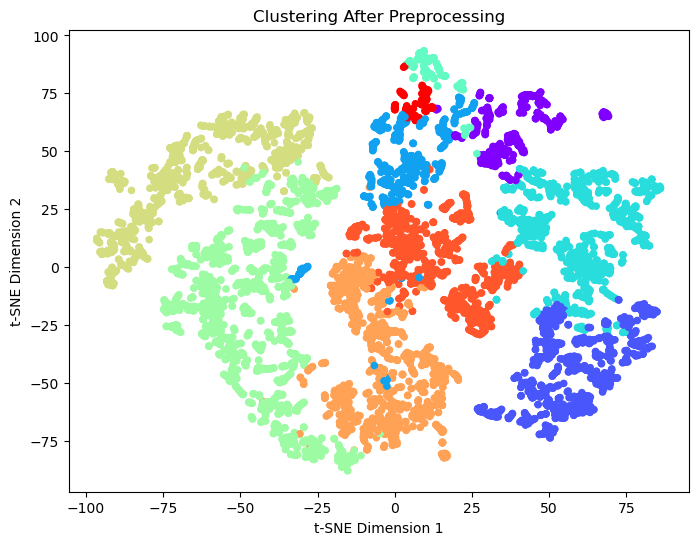

In [ ]:
# plot graph
TSNEplots(prepped_infrared_df,birch_preprocessed,"Clustering After Preprocessing")

In [ ]:
# Clustering After Preprocessing (2 clusters)
birch_preprocessed_2 = birchfunc(prepped_infrared_df, 2)


In [ ]:
# obtain performance metric
silhouetteScore(prepped_infrared_df,birch_preprocessed_2)
calinski_score(prepped_infrared_df,birch_preprocessed_2)
db_score(prepped_infrared_df,birch_preprocessed_2)
accuracy_metric(y_train,birch_preprocessed_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3868445629754047


0.3868445629754047

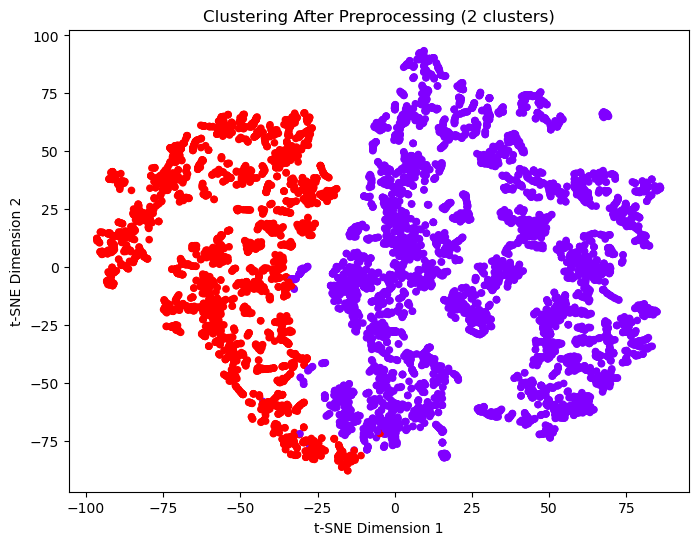

In [ ]:
# plot graph
TSNEplots(prepped_infrared_df,birch_preprocessed_2,"Clustering After Preprocessing (2 clusters)")

In [ ]:
# apply clustering to final df
birch_labels_final = birchfunc(testing_df,10)

In [ ]:
silhouetteScore(testing_df,birch_labels_final)
calinski_score(testing_df,birch_labels_final)
db_score(testing_df,birch_labels_final)
accuracy_metric(y_train,birch_labels_final)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8309131451850831
Calinski-Harabasz Score: 20268.863769804502


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8593132086693576

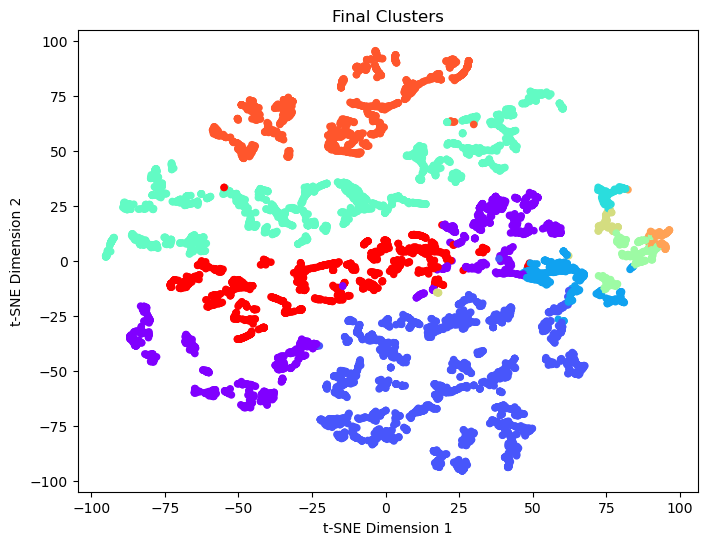

In [ ]:
# plot TSNE graph
TSNEplots(testing_df,birch_labels_final,"Final Clusters")


In [ ]:
# get accuracy
accuracy= accuracy_metric(y_train,birch_labels_final)


Accuracy: 0.6569373501511518


In [ ]:
# apply clustering to lowered freq data df
birch_labels_final = birchfunc(lower_frequency_data.copy(),10)

In [ ]:
# obtain performance metric
silhouetteScore(lower_frequency_data.copy(),birch_labels_final)
calinski_score(lower_frequency_data.copy(),birch_labels_final)
db_score(lower_frequency_data.copy(),birch_labels_final)
accuracy_metric(y_train,birch_labels_final)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.974089196133536
Calinski-Harabasz Score: 27472302.127890006
Davies-Bouldin Score: 0.21585643191605594
Accuracy: 0.5058897112477848


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5058897112477848

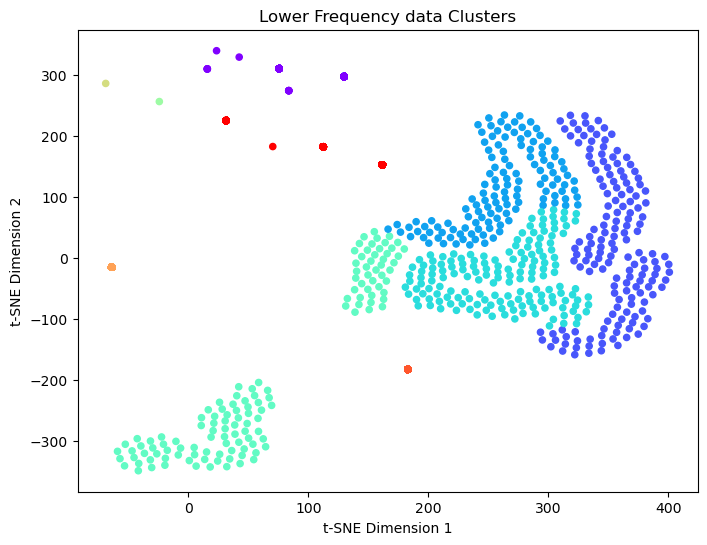

In [ ]:
# plot TSNE graph
TSNEplots(lower_frequency_data.copy(),birch_labels_final,"Lower Frequency data Clusters")

### Silhouette Scores

In [ ]:
silhouetteScoreAllRawBirch = [] 
calinskiRaw =[]
davies_bouldin_raw =[]
# obtain silhouette Scores for raw data by applying clustering for various number of clusters
for i in range(2, 12): 
    raw_labels_pred = birchfunc(x_train,i)
    silhouetteScoreAllRawBirch.append(silhouetteScore(x_train,raw_labels_pred))
    calinskiRaw.append(calinski_score(x_train,raw_labels_pred))
    davies_bouldin_raw.append(db_score(davies_bouldin_raw))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3532791090619684


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1879831451772538


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.19888231502242126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.20393837995988515


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.21153913098707894


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1983724831499671


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2006722206263219


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.0941067338452834


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08785947340116355


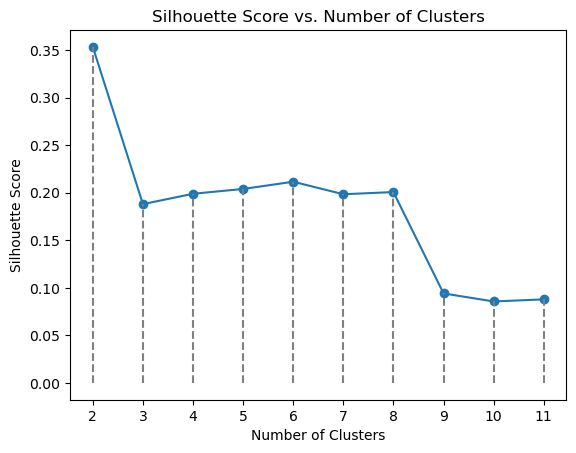

In [ ]:
# plot comparison graph

cluster_range = range(2, 12)
plt.plot(cluster_range, silhouetteScoreAllRawBirch, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouetteScoreAllRawBirch[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
silhouetteScoreAllFinalBirch = [] 
calinski_final = []
davies_bouldin_final = []
# obtain silhouette Scores for final processed data by applying clustering for various number of clusters
for i in range(2, 12): 
    final_labels_pred = birchfunc(testing_df,i)
    silhouetteScoreAllFinalBirch.append(silhouetteScore(testing_df,final_labels_pred))
    calinski_final.append(calinski_score(testing_df,final_labels_pred))
    davies_bouldin_final.append(db_score(testing_df,final_labels_pred))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7356461348732126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.49740497820875224


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5026851853104387


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.48859566431607565


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.515746183765349


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5208769405849668


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5210412926966709


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4628274317091819


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.45358329187532015


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.45782399699704873


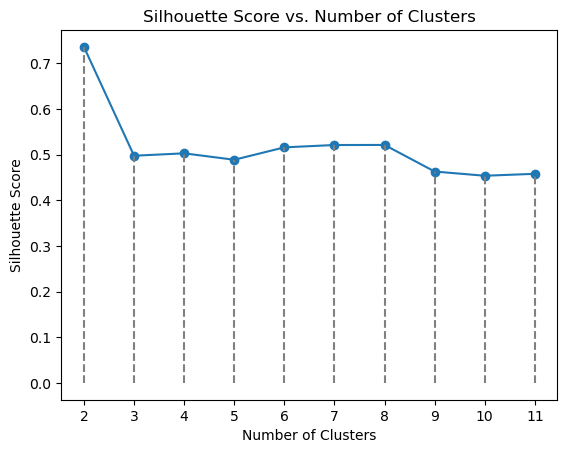

In [ ]:
# plot comparison graph

cluster_range = range(2, 12)
plt.plot(cluster_range, silhouetteScoreAllFinalBirch, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouetteScoreAllFinalBirch[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Comparision

In [ ]:
# obtain performance metrics for different number of clusters
raw_scores = silhouetteScoreAllRawBirch[::2]
processed_scores = silhouetteScoreAllFinalBirch[::2]
silhouette_bf = [raw_scores,processed_scores]
calinski_bf  = [calinskiRaw[::2],calinski_final[::2]]
davies_bouldin_bf = [davies_bouldin_raw[::2],davies_bouldin_final[::2]]

x_axis = ["Raw", "After Pre-processing"]
y_axis = ["2 Clusters", "4 Clusters", "6 Clusters", "8 Clusters", "10 Clusters"] 
pd.DataFrame(silhouette_bf, x_axis, y_axis)

2 Clusters  4 Clusters  6 Clusters  8 Clusters  \
Raw                     0.353279    0.198882    0.211539    0.200672   
After Pre-processing    0.735646    0.502685    0.515746    0.521041   

                      10 Clusters  
Raw                      0.085637  
After Pre-processing     0.453583

In [ ]:
pd.DataFrame(calinski_bf, x_axis, y_axis)

In [ ]:
pd.DataFrame(davies_bouldin_bf, x_axis, y_axis)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=1.0,min_samples=1)
dbs_labels = dbs.fit_predict(lower_frequency_data)

silhouetteScore(lower_frequency_data,dbs_labels)
calinski_score(lower_frequency_data,dbs_labels)
db_score(lower_frequency_data,dbs_labels)
accuracy_metric(y_train,dbs_labels)

Silhouette Score: 0.9705698803245656


0.9705698803245656

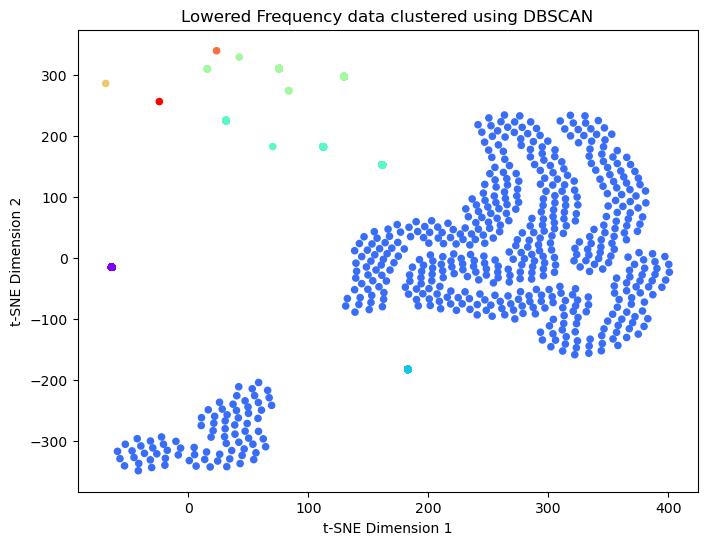

In [ ]:
TSNEplots(lower_frequency_data,dbs_labels,"Lowered Frequency data clustered using DBSCAN")

In [ ]:
iso_data
dbs = DBSCAN(eps=0.5,min_samples=1)
dbs_labels = dbs.fit_predict(iso_data)

silhouetteScore(iso_data,dbs_labels)
calinski_score(iso_data,dbs_labels)
db_score(iso_data,dbs_labels)
accuracy_metric(y_train,dbs_labels)

Silhouette Score: 0.2859507660409772


0.2859507660409772

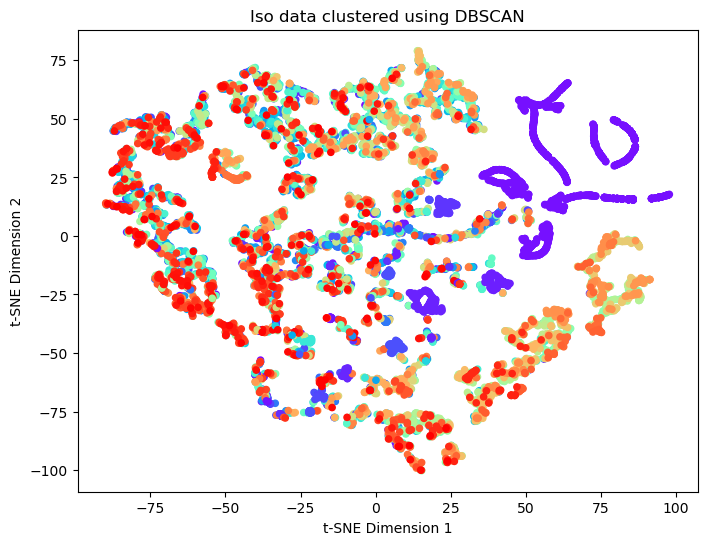

In [ ]:
TSNEplots(iso_data,dbs_labels,"Iso data clustered using DBSCAN")

# Soft Clustering

In [273]:
isomap = Isomap(n_components=500)
test_pdf2 = isomap.fit_transform(image_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [274]:
from sklearn.manifold import TSNE


def tSNEplots(data, cluster_labels, title):
    tsne = TSNE(n_components=2, random_state=19)
    tsne_result = tsne.fit_transform(data) 
    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()


tsne = TSNE(n_components=2, random_state=19)
tsne_result = tsne.fit_transform(test_pdf2)

### GMM (Guassian Mixture Model)

In [275]:
from sklearn.mixture import GaussianMixture

def Gmm(data,clus): # function to perform GMM on the data
    n_clusters = clus # assigned the number of clusters given in the function call

    gmm = GaussianMixture(n_components=n_clusters) #initializing GMM
    gmm.fit(data) #fitting the data

    cluster_assignments = gmm.predict(data) #getting the cluster assignments
    membership_probabilities = gmm.predict_proba(data) #getting the probabilities for eah assignment

    silhouetteScore(data, cluster_assignments) #calculating the silhouette score
    return cluster_assignments #returns the assignments given by algorithm

In [276]:
cluster_labels = Gmm(test_pdf2, 10) #getting the cluster assignments
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 10) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

Silhouette Score: 0.4453772662473406
Davies-Bouldin Score: 2.1002148283481104
Calinski-Harabasz Score: 916.3807418842102
Accuracy: 0.3084540811008027
Silhouette Score: 0.4453772662473406


0.4453772662473406

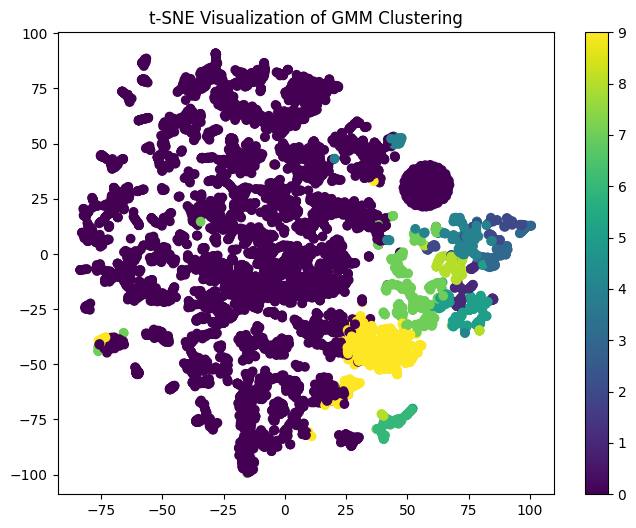

In [277]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of GMM Clustering')

In [278]:
cluster_labels = Gmm(test_pdf2, 5)  #getting the cluster assignments
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

Silhouette Score: 0.6356730475612135
Davies-Bouldin Score: 2.1251932888427842
Calinski-Harabasz Score: 1462.6778459887205
Accuracy: 0.29073282601897216
Silhouette Score: 0.6356730475612135


0.6356730475612135

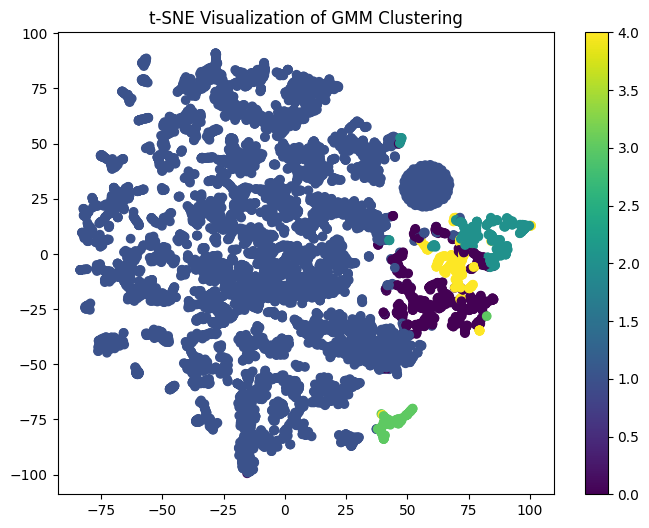

In [279]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of GMM Clustering')

In [280]:
cluster_labels = Gmm(test_pdf2,2)  #getting the cluster assignments
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 2) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

Silhouette Score: 0.6924625992662189
Davies-Bouldin Score: 1.2782583117595452
Calinski-Harabasz Score: 3467.899378584689
Accuracy: 0.26446367142708227
Silhouette Score: 0.6924625992662189


0.6924625992662189

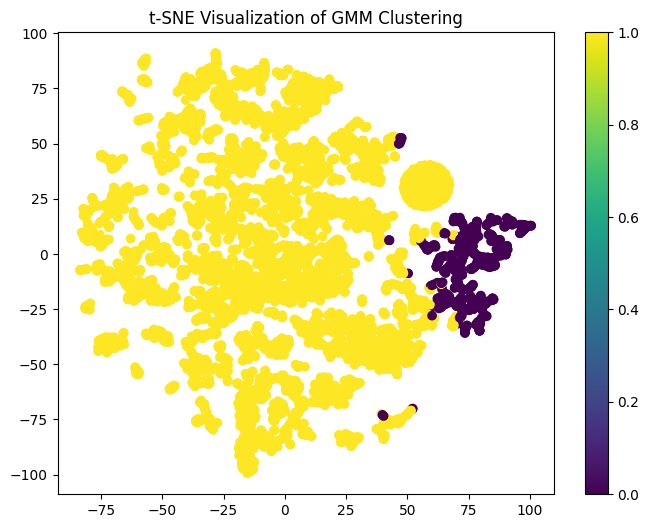

In [281]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of GMM Clustering')

### FCM (Fuzzy C-Means)

In [282]:
import skfuzzy as fuzz

def fuzzy(data,clus): # function to perform FCM on the data
    n_clusters = clus  # assigned the number of clusters given in the function call
    best_sil_sc = None #initializing the best silhoutte sore
    best_clus_assignment = None #initializing the assignmnets depending on the best silhoutte score

    m = 2 # setting the fuzziness coefficient
    # running FCM on the data
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=0.005, maxiter=1000, init=None)
    cluster_assignments = np.argmax(u, axis=0) #Assigning data labels to clusters based on the maximum membership value
    membership_values = u # Storing membership values
    print("The Fuzzy Co-efficient",m) # Printing the fuzziness coefficient
    sil_score = silhouetteScore(data, cluster_assignments) #calculating the silhouette score
    best_sil_sc = sil_score # Store the silhouette score as the best so far
    best_clus_assignment = cluster_assignments # Store the cluster assignments as the best so far
    
    for i in range(3,6): #checking the rest of the coeffcients values
        m = i # setting the fuzziness coefficient
        # running FCM on the data
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=0.005, maxiter=1000, init=None)

        cluster_assignments = np.argmax(u, axis=0) #Assigning data labels to clusters based on the maximum membership value
        membership_values = u # Storing membership values
        print("\nThe Fuzzy Co-efficient",m) # Printing the fuzziness coefficient
        sil_score = silhouetteScore(data, cluster_assignments) #calculating the silhouette score
        if sil_score > best_sil_sc: #checking if the silhouette score is better
            best_sil_sc = sil_score #assigning if it is
            best_clus_assignment = cluster_assignments #assigning the respected cluster assignments
    
    return best_clus_assignment #returning the best labels

In [283]:
cluster_labels = fuzzy(test_pdf2, 10)  #getting the cluster assignments

print("\n\nMetrics for Best Fuzzy Co-efficient: ") # Printing the fuzziness coefficient
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 10) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

The Fuzzy Co-efficient 2
Silhouette Score: -0.21691384009507061

The Fuzzy Co-efficient 3
Silhouette Score: -0.10950651705269913

The Fuzzy Co-efficient 4
Silhouette Score: 0.42335365259948743

The Fuzzy Co-efficient 5
Silhouette Score: 0.05539142179845206


Metrics for Best Fuzzy Co-efficient: 
Davies-Bouldin Score: 3.0170372539006696
Calinski-Harabasz Score: 494.11448303816513
Accuracy: 0.30178254977587826
Silhouette Score: 0.42335365259948743


0.42335365259948743

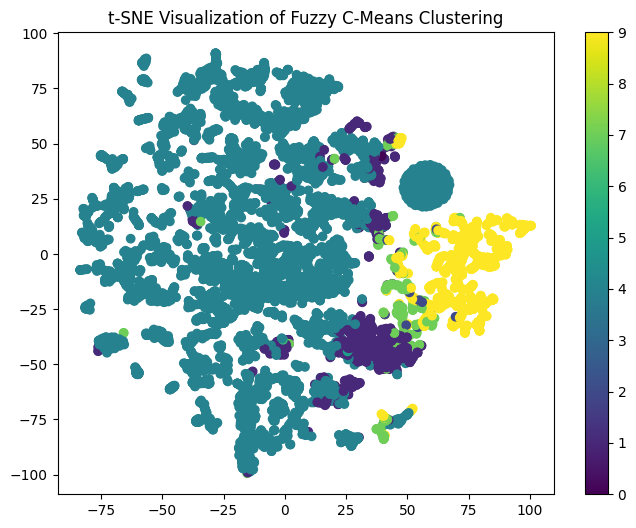

In [284]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')

In [285]:
cluster_labels = fuzzy(test_pdf2,5)  #getting the cluster assignments
print("\n\nMetrics for Best Fuzzy Co-efficient: ") # Printing the fuzziness coefficient
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

The Fuzzy Co-efficient 2
Silhouette Score: 0.07281719800850155

The Fuzzy Co-efficient 3
Silhouette Score: 0.4233500474381772

The Fuzzy Co-efficient 4
Silhouette Score: 0.4385081518929907

The Fuzzy Co-efficient 5
Silhouette Score: 0.3882695695592098


Metrics for Best Fuzzy Co-efficient: 
Davies-Bouldin Score: 5.038504387315259
Calinski-Harabasz Score: 836.5470783647369
Accuracy: 0.2986552694673199
Silhouette Score: 0.4385081518929907


0.4385081518929907

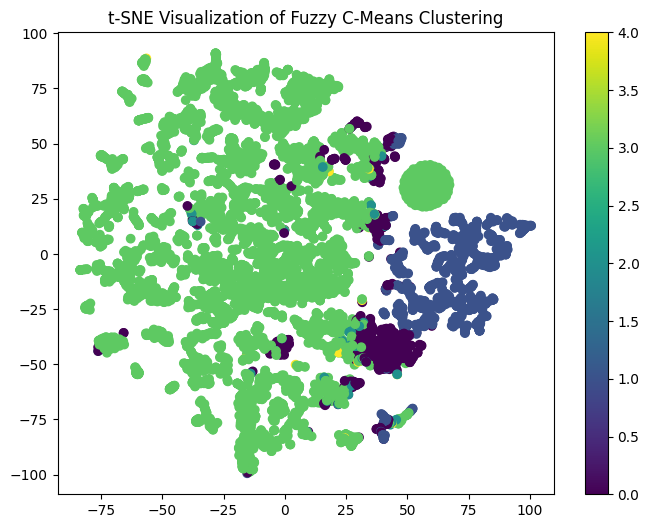

In [286]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')

In [287]:
cluster_labels = fuzzy(test_pdf2,2)  #getting the cluster assignments
print("\n\nMetrics for Best Fuzzy Co-efficient: ") # Printing the fuzziness coefficient
db_score(test_pdf2, cluster_labels) #calculating the davies bouldin score
calinski_score(test_pdf2, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 2) #calculating the accuracy
silhouetteScore(test_pdf2, cluster_labels) #calculating the silhouette score

The Fuzzy Co-efficient 2
Silhouette Score: 0.6659566964858707

The Fuzzy Co-efficient 3
Silhouette Score: 0.6509018121229937

The Fuzzy Co-efficient 4
Silhouette Score: 0.6389235073097306

The Fuzzy Co-efficient 5
Silhouette Score: 0.631309747721176


Metrics for Best Fuzzy Co-efficient: 
Davies-Bouldin Score: 1.4792618781499136
Calinski-Harabasz Score: 3209.7216865210144
Accuracy: 0.2769727926613155
Silhouette Score: 0.6659566964858707


0.6659566964858707

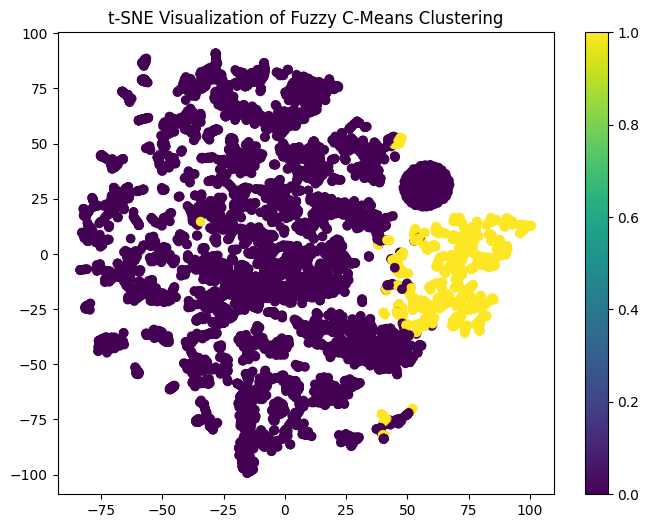

In [288]:
# Create a scatter plot to visualize the clusters

tSNEplots(test_pdf2, cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')

### GMM and FCM on PCA with 50 and 5 principal components

In [289]:
image_df

0     1     2     3     4     5     6     7     8     9     ...  2294  \
0       12    12    12    12    12    12    12    12    12    12  ...    13   
1       12    12    12    12    12    12    12    12    12    12  ...    13   
2       12    12    12    12    12    12    12    12    12    12  ...    13   
3       12    12    12    12    12    12    12    12    12    12  ...    13   
4       12    12    12    12    12    12    12    12    12    12  ...    13   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9588    24    24    24    21    19    21    24    26    26    26  ...    13   
9589    15    18    20    26    26    26    26    26    26    26  ...    13   
9590    26    26    26    26    26    26    26    26    26    26  ...    13   
9591    26    26    26    26    26    26    26    26    26    26  ...    13   
9592    23    23    23    23    26    23    20    18    15    12  ...    13   

      2295  2296  2297  2298  2299  2300  2301  2302  2303  
0       13    13    13    13    13    13    13    13    13  
1       13    13    13    13    13    13    13    13    13  
2       13    13    13    13    13    13    13    13    13  
3       13    13    13    13    13    13    13    13    13  
4       13    13    13    13    13    13    13    13    13  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
9588    13    13    13    13    13    13    13    13    13  
9589    13    13    13    13    13    13    13    13    13  
9590    13    13    13    13    13    13    13    13    13  
9591    13    13    13    13    13    13    13    13    13  
9592    13    13    13    13    13    13    13    13    13  

[9593 rows x 2304 columns]

In [290]:
prep_50pca = PCAOnData(image_df, 50) #applying pca for 50 principal components
prep_5pca = PCAOnData(image_df ,5) #applying pca for 5 principal components

#### GMM and FCM on PCA 50 

GMM on 10 clusters


/opt/homebrew/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Silhouette Score: -0.09477183491613539
Davies-Bouldin Score: 2.3194088372499975
Calinski-Harabasz Score: 1840.3442482398968
Accuracy: 0.33639111852392367


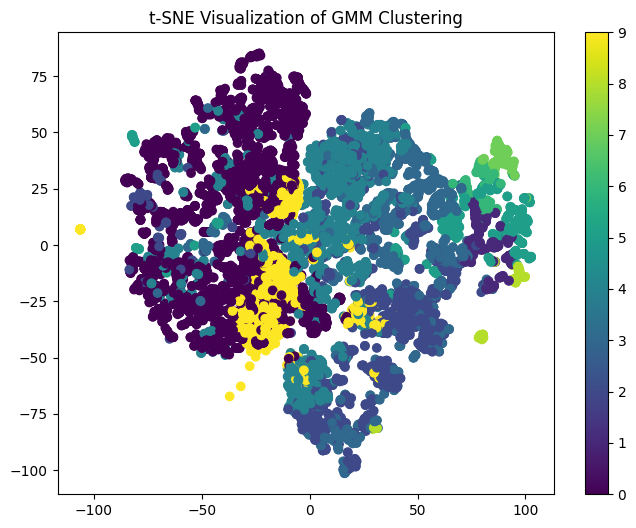

GMM on 5 clusters
Silhouette Score: 0.19605155816747136
Davies-Bouldin Score: 2.2998008413290516
Calinski-Harabasz Score: 2749.6403216798153
Accuracy: 0.3012613363911185


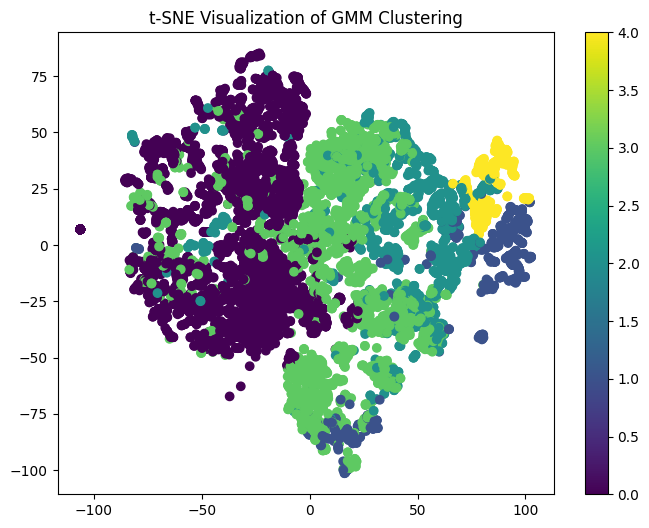

GMM on 2 clusters
Silhouette Score: 0.3037049999085933
Davies-Bouldin Score: 1.5210329775978573
Calinski-Harabasz Score: 1907.6790121127995
Accuracy: 0.2771812780152194


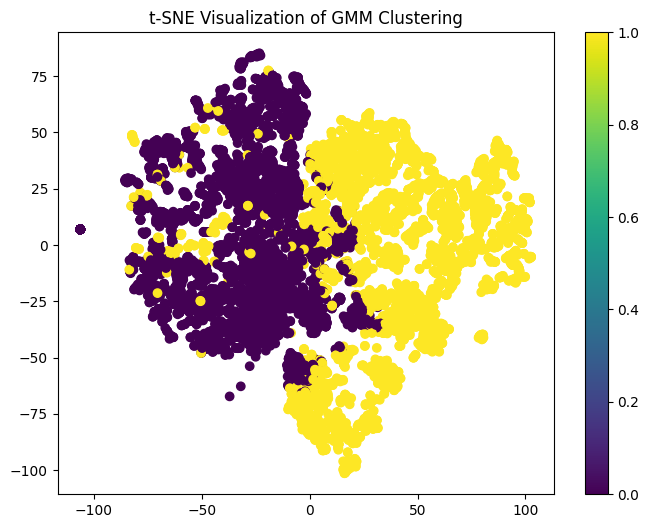

In [291]:
print("GMM on 10 clusters")
cluster_labels = Gmm(prep_50pca,10) #getting the cluster assignments
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 10) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels, "t-SNE Visualization of GMM Clustering") #plotting the graph

print("GMM on 5 clusters")
cluster_labels = Gmm(prep_50pca,5) #getting the cluster assignments
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels, "t-SNE Visualization of GMM Clustering") #plotting the graph

print("GMM on 2 clusters")
cluster_labels = Gmm(prep_50pca,2) #getting the cluster assignments
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 2) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels, "t-SNE Visualization of GMM Clustering") #plotting the graph

Fuzzy C-Means on 10 clusters
The Fuzzy Co-efficient 2
Silhouette Score: 0.5155791236694142

The Fuzzy Co-efficient 3
Silhouette Score: 0.26880197963537444

The Fuzzy Co-efficient 4
Silhouette Score: 0.2062832521890968

The Fuzzy Co-efficient 5
Silhouette Score: 0.1797217584940947
Accuracy: 0.30063588032940686
Davies-Bouldin Score: 1.927840189605865
Calinski-Harabasz Score: 4513.898171123835


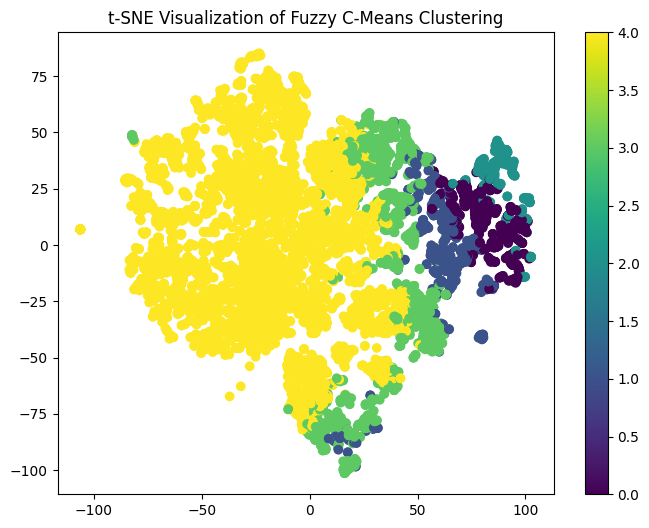



Fuzzy C-Means on 5 clusters
The Fuzzy Co-efficient 2
Silhouette Score: 0.5155791236694142

The Fuzzy Co-efficient 3
Silhouette Score: 0.26889684629354615

The Fuzzy Co-efficient 4
Silhouette Score: 0.2062832521890968

The Fuzzy Co-efficient 5
Silhouette Score: 0.17966413494101077
Accuracy: 0.30063588032940686
Davies-Bouldin Score: 1.927840189605865
Calinski-Harabasz Score: 4513.898171123836


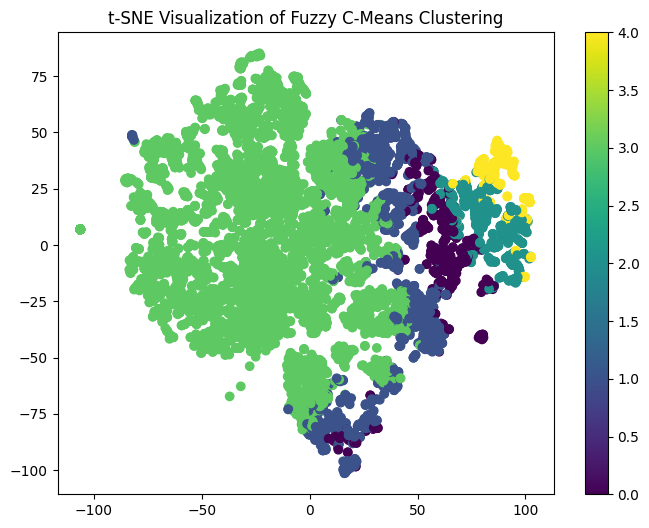



Fuzzy C-Means on 2 clusters
The Fuzzy Co-efficient 2
Silhouette Score: 0.5155791236694142

The Fuzzy Co-efficient 3
Silhouette Score: 0.26885759146725774

The Fuzzy Co-efficient 4
Silhouette Score: 0.20623932697691336

The Fuzzy Co-efficient 5
Silhouette Score: 0.17966413494101077
Accuracy: 0.30063588032940686
Davies-Bouldin Score: 1.9278401896058655
Calinski-Harabasz Score: 4513.898171123837


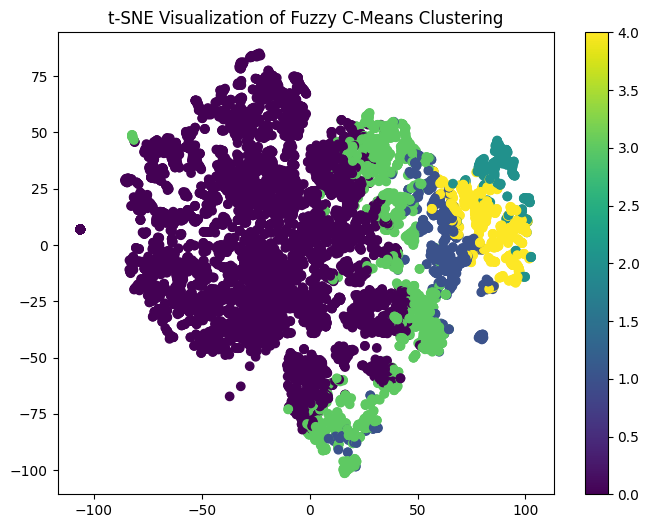

In [292]:
print("Fuzzy C-Means on 10 clusters")
cluster_labels = fuzzy(prep_50pca, 5) #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_50pca,cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering') #plotting the graph

print("\n")

print("Fuzzy C-Means on 5 clusters")
cluster_labels = fuzzy(prep_50pca,5) #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_50pca,cluster_labels,'t-SNE Visualization of Fuzzy C-Means Clustering') #plotting the graph
print("\n")

print("Fuzzy C-Means on 2 clusters")
cluster_labels = fuzzy(prep_50pca,5) #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
db_score(prep_50pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_50pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_50pca,cluster_labels,'t-SNE Visualization of Fuzzy C-Means Clustering') #plotting the graph
print("\n")

#### GMM and FCM on PCA 5

GMM on 10 clusters


Silhouette Score: 0.21815618281753246
Accuracy: 0.30501407276138853
Davies-Bouldin Score: 1.6347359352986974
Calinski-Harabasz Score: 4346.151501584592


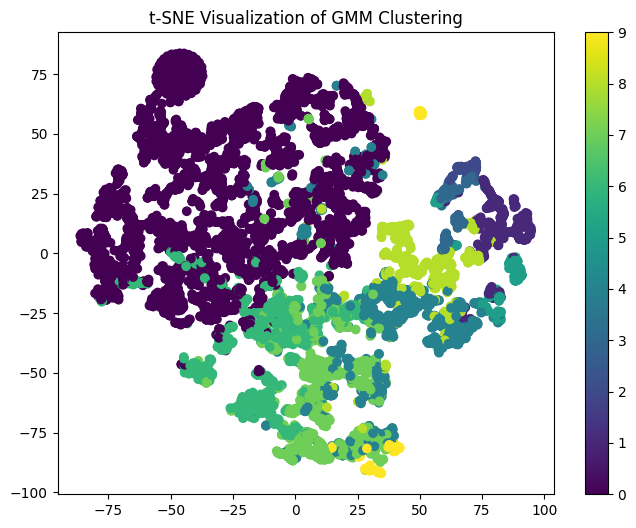

GMM on 5 clusters
Silhouette Score: 0.2584687705578169
Accuracy: 0.2914625247576358
Davies-Bouldin Score: 1.5812052505510383
Calinski-Harabasz Score: 4638.388254820873


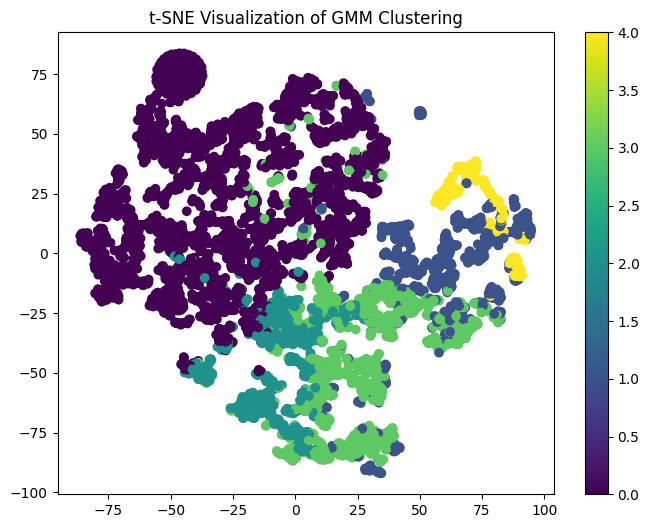

GMM on 2 clusters
Silhouette Score: 0.47352561426504247
Accuracy: 0.2865631189408944
Davies-Bouldin Score: 1.1348715764010124
Calinski-Harabasz Score: 4004.900318576646


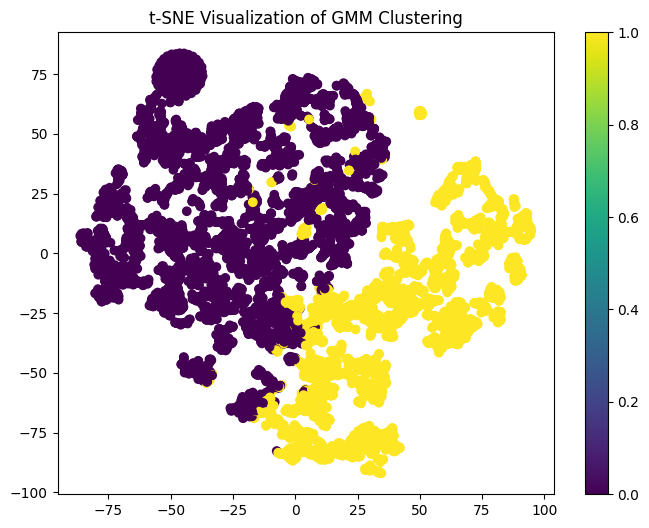

In [293]:
print("GMM on 10 clusters")
cluster_labels = Gmm(prep_5pca,10)  #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 10) #getting the accuracy for the above cluster assignment
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of GMM Clustering') #plotting the graph

print("GMM on 5 clusters")
cluster_labels = Gmm(prep_5pca, 5)  #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of GMM Clustering') #plotting the graph

print("GMM on 2 clusters")
cluster_labels = Gmm(prep_5pca, 2)  #getting the cluster assignments
accuracy_metric(y_train, cluster_labels, 2) #getting the accuracy for the above cluster assignment
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score

tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of GMM Clustering') #plotting the graph

Fuzzy C-Means on 10 clusters
The Fuzzy Co-efficient 2


Silhouette Score: 0.6162558648547991

The Fuzzy Co-efficient 3
Silhouette Score: 0.5516942982485621

The Fuzzy Co-efficient 4
Silhouette Score: 0.31119279471355477

The Fuzzy Co-efficient 5
Silhouette Score: 0.2789579934290989
Davies-Bouldin Score: 1.20872597845455
Calinski-Harabasz Score: 10374.321014025192
Accuracy: 0.29928072552903157


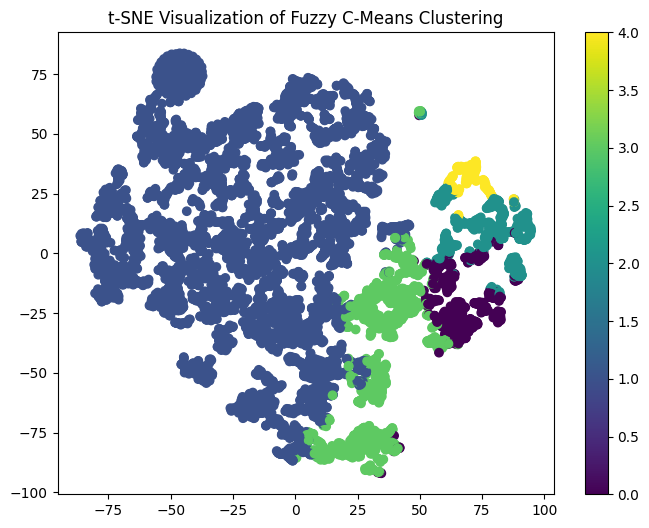



Fuzzy C-Means on 5 clusters
The Fuzzy Co-efficient 2
Silhouette Score: 0.6161456853870987

The Fuzzy Co-efficient 3
Silhouette Score: 0.5516942982485621

The Fuzzy Co-efficient 4
Silhouette Score: 0.31119279471355477

The Fuzzy Co-efficient 5
Silhouette Score: 0.2789579934290989
Davies-Bouldin Score: 1.2080363219203427
Calinski-Harabasz Score: 10375.185850866617
Accuracy: 0.2990722401751277


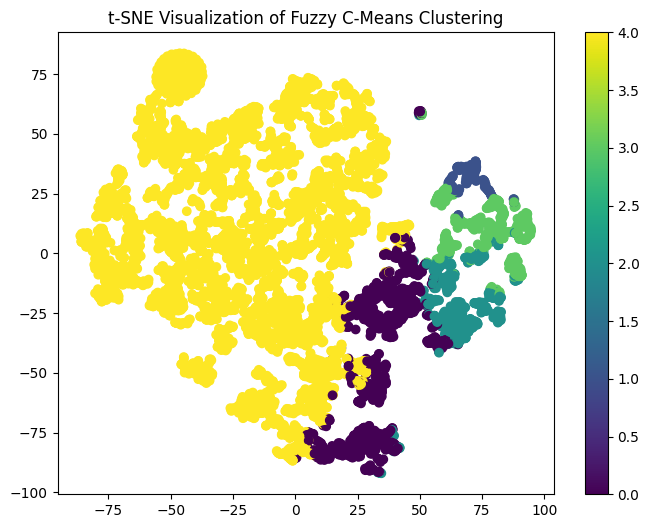



Fuzzy C-Means on 2 clusters
The Fuzzy Co-efficient 2
Silhouette Score: 0.6161456853870987

The Fuzzy Co-efficient 3
Silhouette Score: 0.551634181959193

The Fuzzy Co-efficient 4
Silhouette Score: 0.310517806606212

The Fuzzy Co-efficient 5
Silhouette Score: 0.27887039865666263
Davies-Bouldin Score: 1.2080363219203423
Calinski-Harabasz Score: 10375.185850866617
Accuracy: 0.2990722401751277


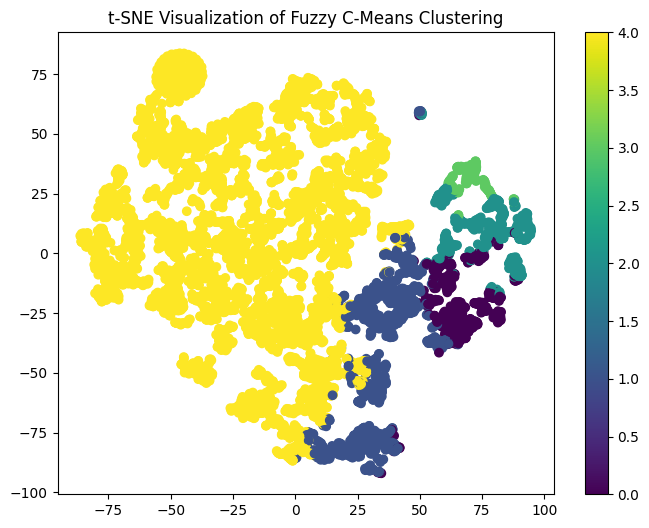

In [294]:
print("Fuzzy C-Means on 10 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')  #plotting the graph
print("\n")

print("Fuzzy C-Means on 5 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')  #plotting the graph
print("\n")

print("Fuzzy C-Means on 2 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
db_score(prep_5pca, cluster_labels) #calculating the davies bouldin score
calinski_score(prep_5pca, cluster_labels) #calculating the calinski harabasz score
accuracy_metric(y_train, cluster_labels, 5) #getting the accuracy for the above cluster assignment
tSNEplots(prep_5pca,cluster_labels, 't-SNE Visualization of Fuzzy C-Means Clustering')  #plotting the graph
print("\n")